# EDA on Userbase

* Show reviewer Location composition
* Show top 10 universally most reviewed products
* Show top 10 most reviewed products across each category
* Show top 10 categories with most number of reviewed products
* Show average total reviews for each category
* Show top 10 most useful reviews across each category
* Look at top 10 reviewers with most reviews
    * From what subcategory do they order the most? What items have they purchased from these subcategories?
    * What is their average rating?
    * Where are they from?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 2000)

categories_dict = {
    "Children": ["action figures", "building toys", "toddler toy", "toy airplanes", "toy cars",
                 "toy dolls", "baby bottle", "baby formula", "baby wipes", "car seat", "crib",
                 "diaper", "nursery", "pacifier", "stroller"],
    "Books": ["adventure novel", "fantasy novel", "mystery novel", "nonfiction novel", "romance novels",
              "science fiction novel", "thriller novel", "young adult novel"],
    "Cleaning Material": ["vacuum", "detergent", "mop", "broom", "dishwasher", "fabric conditioner"],
    "Kitchen": ["utensils", "air fryer", "coffee maker", "frying pan", "kitchen knife", "microwave",
                "oven", "over the counter", "steamer", "stove", "kitchen", "dining room"],
    "Bedroom": ["bedding", "bedroom", "toilet", "playroom", "desk lamp", "iron", "lamp", "bedframe",
                "bookshelf", "cabinet", "desk", "dresser", "nightstand"],
    "Living Room": ["carpet", "home decor", "living room", "ring doorbell", "wall mount", "curtain",
                    "coffee table", "couch", "chair", "furniture", "patio", "shoe rack"],
    "Bathroom": ["bathroom", "mattress", "pillow", "air purifier", "washing machine",
                 "air freshener", "mirror", "linen"],
    "Fashion": ["belt", "cap", "coat", "dress", "face mask", "jewelry", "men bag",
                "men jeans", "men shirt", "men shoes", "men sweater", "socks", "underwear",
                "women bag", "women jeans", "women shirt", "women shirt", "women shoes",
                "women sweater", "workout clothes"],
    "Electronic Devices": ["camera", "headphones", "laptop", "monitor", "smart watch",
                           "speakers", "surveillance camera",
                           "tablet", "television", "videogame console", "wifi router"],
    "Peripheral Devices": ["keyboard", "mouse", "webcam", "microphone", "printer", "projector",
                           "usb", "computer accessories"],
    "Computer Components": ["pc ram", "cpu cooler", "gpu", "hard drive", "intel amd processor",
                            "motherboard", "pc chassis", "pc fan", "pc power supply", "solid state drive"],
    "Mobile Accessories": ["cables", "chargers", "phone case", "screen protector", "tripod"],
    "Personal Care": ["conditioner", "deodorant", "face wash", "facial toner", "feminine wash",
                      "lotion", "makeup", "moisturizer", "mouthwash", "shaving cream", "shampoo", "soap",
                      "tampon", "tissue", "toothbrush", "vitamins"],
    "Car Stuff": ["car accessories", "dash cam", "gps", "ram vehicles", "tires", "garage"],
    "Office Supplies": ["office chair", "folder", "home_office", "notebook", "school supplies", "stationary", "seat cushion"],
    "Travel Essentials": ["first aid", "luggage", "packing cubes", "stanley cup", "travel essentials", "water flask", "portable fan"]
}

In [3]:
df = pd.read_csv('clean_data/users/All_Reviewers_V2.csv')
df.head(10)

reviewerName  reviewRating       Location                Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName      FolderName
0                            TK-815TK-815           5.0  United States  September 21, 2022  5.0 out of 5 stars Fantastic War Droid, Not So...  I am impressed with this figure. The sculpt is...           13                    True  AH4NM3KGMDME7SKRSJD73TIBABIQ  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
1                                vyeranos           5.0  United States    January 13, 2024  5.0 out of 5 stars Good addition to the collec...  Delivered on time and at a good price. My than...            0                    True  AESWEZHPRRYTZRW2FBIJSXEKGTFA  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
2                                   Marty           5.0  United States   November 24, 2023                        5.0 out of 5 stars Detailed                 These figures look pretty detailed            0                    True  AHGIPPEB6HKSXNPB6Y3DLBKCVRHQ  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
3                                    Kati           5.0  United States     January 2, 2024                         5.0 out of 5 stars Perfect                  Perfect condition, quick delivery            0                    True  AHWQ73WR7MVGBKDB5YE6C4WDPNJA  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
4  Lochlan LongstriderLochlan Longstrider           4.0  United States  September 18, 2023                   4.0 out of 5 stars Needs a stand  Cool dark droid; although, he really doesn't l...            0                    True  AHSHUIZHSPWYY3OD3PI56MSBKZ4Q  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
5                                  Sammie           5.0  United States    February 3, 2024                       5.0 out of 5 stars Must have  My son absolutely loves Star Wars. Awesome qua...            0                    True  AE6C5E7E4B44BCOBLH5SNC37HY7Q  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
6                                    WW38           5.0  United States   December 21, 2023          5.0 out of 5 stars Perfect birthday gift!  Product was in perfect condition and was a gre...            0                    True  AGZGSSBTSLNRCF4ZCYEAXB6G6O7A  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
7                                Tiffany            5.0  United States   December 27, 2023                    5.0 out of 5 stars Very pleased  Everything I expected from the picture and my ...            0                    True  AGHUA746X7QZ2NUQZ6EDADOXMKNA  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
8                                      AB           5.0            NaN                 NaN                                Lo recomiendo mucho  Muy buena figura,buen esculpido y buena articu...            0                    True                           NaN  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures
9                                 Richard           5.0            NaN                 NaN                                           Love it.                   Let be the detail, great figure.            0                    True                           NaN  STAR WARS The Black Series Dark Trooper Toy 6-...  action figures

# Utility Functions

In [4]:
def truncate_key_length(dictionary, max_len):
    """
    Return dictionary with truncated keys
    """
    return {k[:max_len]: v for k, v in dictionary.items()}

def group_df_by_key_sorted(df, key, topn):
    """
    Return df grouped by key and sorted in descending order
    """
    grouped_df = df.groupby(key)
    group_counts = grouped_df.size()
    sorted_groups = group_counts.sort_values(
        ascending=False)[:topn].to_dict()
    return truncate_key_length(sorted_groups, 30)

def list_of_grouped_dfs(df, categories_dict):
    """
    Return list of grouped dfs across categories
    """
    grouped_dfs_list = {}
    grouped_dfs_dfs = {}
    for index, row in df.iterrows():
        for category in categories_dict:
            if row.FolderName in categories_dict[category]:
                if category in grouped_dfs_list.keys():
                    grouped_dfs_list[category].append(row)
                else:
                    grouped_dfs_list[category] = [row]
    for category in categories_dict:
        df = pd.concat(grouped_dfs_list[category], axis=1).T
        grouped_dfs_dfs[category] = df
    return grouped_dfs_dfs

def for_each_category(
        grouped_by_category_dict, key, topn, 
        chart_type, xlabel=None, ylabel=None, sortkey=None, title=None):
    """
    Plot each category based on a key and chart type
    """
    for category in grouped_by_category_dict:
        grouped_dict = group_df_by_key_sorted(grouped_by_category_dict[category], key, topn)
        if chart_type == 'pie':
            plot_pie(grouped_dict, f"Top {topn} {key}s in {category}")
        elif chart_type == 'bar':
            plot_bar(grouped_dict, f"Top {topn} {key}s in {category}", xlabel, ylabel)
        elif chart_type == 'table':
            print(f"{title} in {category}")
            group_df_by_multiple_keys(grouped_by_category_dict[category], key, sortkey, topn)
            print("\n")

def group_df_by_multiple_keys(df, key, sortkey, topn):
    """
    Display df grouped by key (list) and sorted in descending order
    """
    truncated_df = df.copy()
    truncated_df['reviewText'] = truncated_df['reviewText'].str[:300]
    grouped_df = truncated_df.groupby(key).sum()
    grouped_df = grouped_df.sort_values(sortkey, ascending=False)[:topn]
    grouped_df.reset_index(inplace=True)
    display(grouped_df.set_index(["reviewerID"]))
    

def plot_pie(mydict, title):
    """
    Utility function that plots pie chart based on dictionary
    """
    plt.figure(figsize=(10, 10))
    plt.pie(mydict.values(), labels=mydict.keys(), autopct='%1.1f%%')
    plt.title(title)
    plt.show()

def plot_bar(mydict, title, xlabel, ylabel):
    """
    Utility function that plots bar chart based on dictionary
    """
    plt.figure(figsize=(10, 10))
    plt.bar(mydict.keys(), mydict.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=60)
    plt.show()

# Reviewer Location Composition

In [5]:
# group each row by category
grouped_by_category_dict = list_of_grouped_dfs(df, categories_dict)

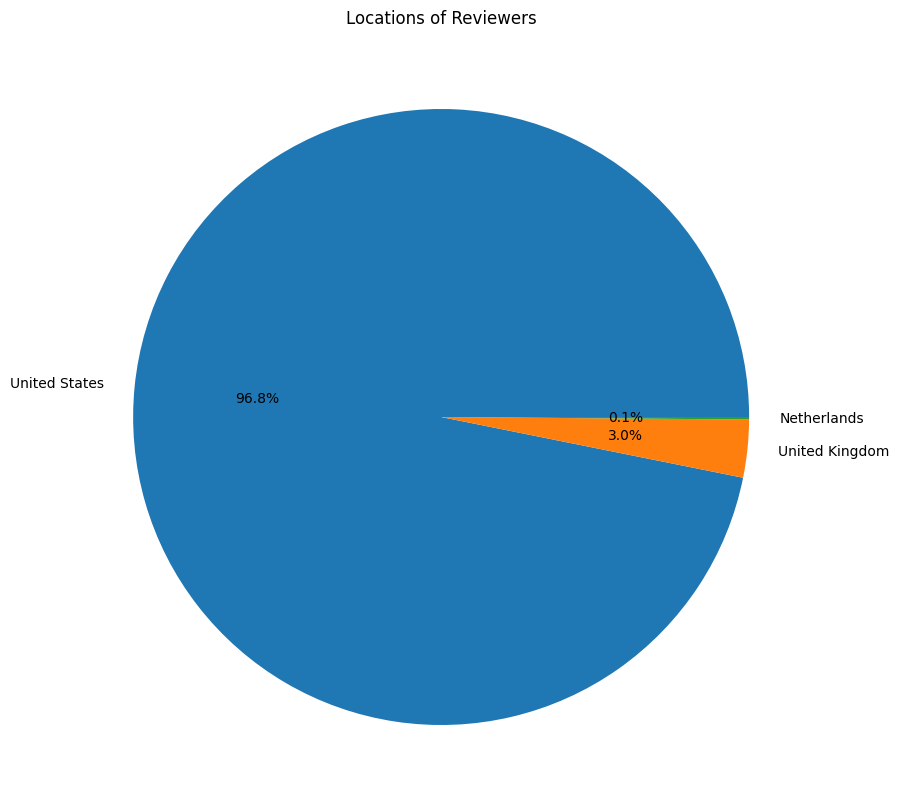

In [6]:
location_dict = group_df_by_key_sorted(df, "Location", 10)
plot_pie(location_dict, "Locations of Reviewers")

# Top 10 Universally Most Reviewed Products

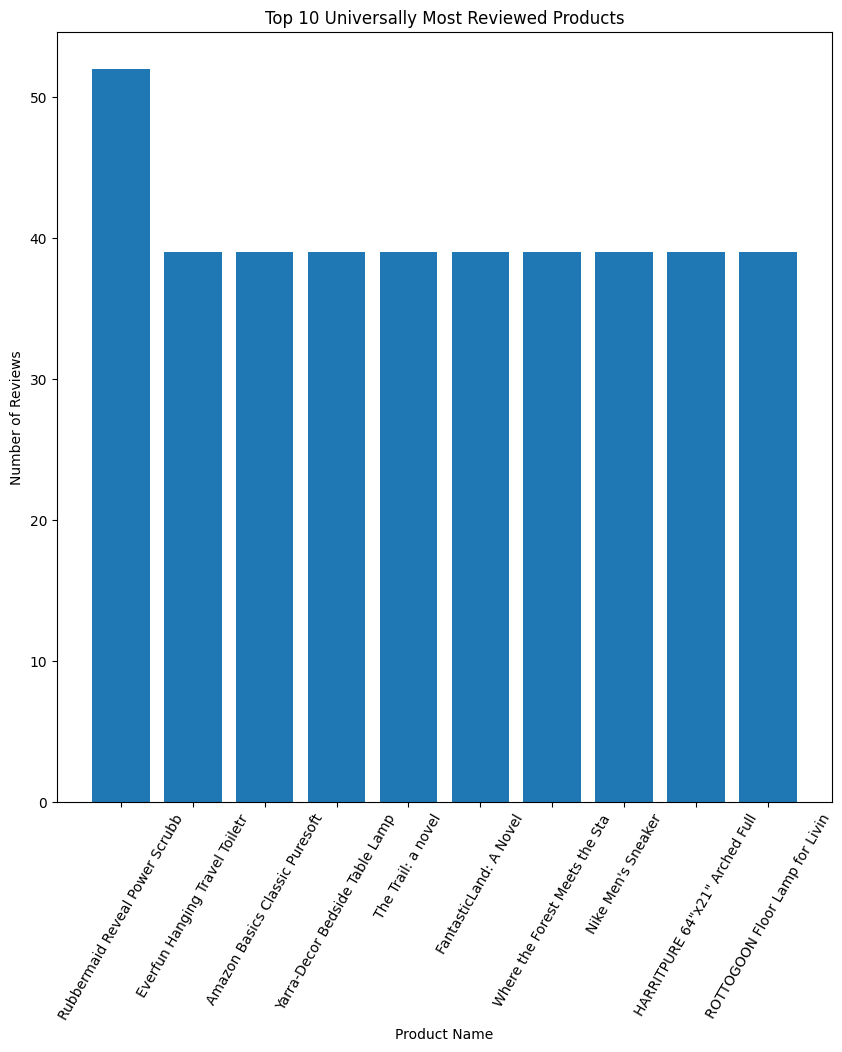

In [7]:
product_dict= group_df_by_key_sorted(df, "ProductName", 10)
plot_bar(product_dict, "Top 10 Universally Most Reviewed Products", "Product Name", "Number of Reviews")

# Top 10 Most Reviewed Products Across Each Category

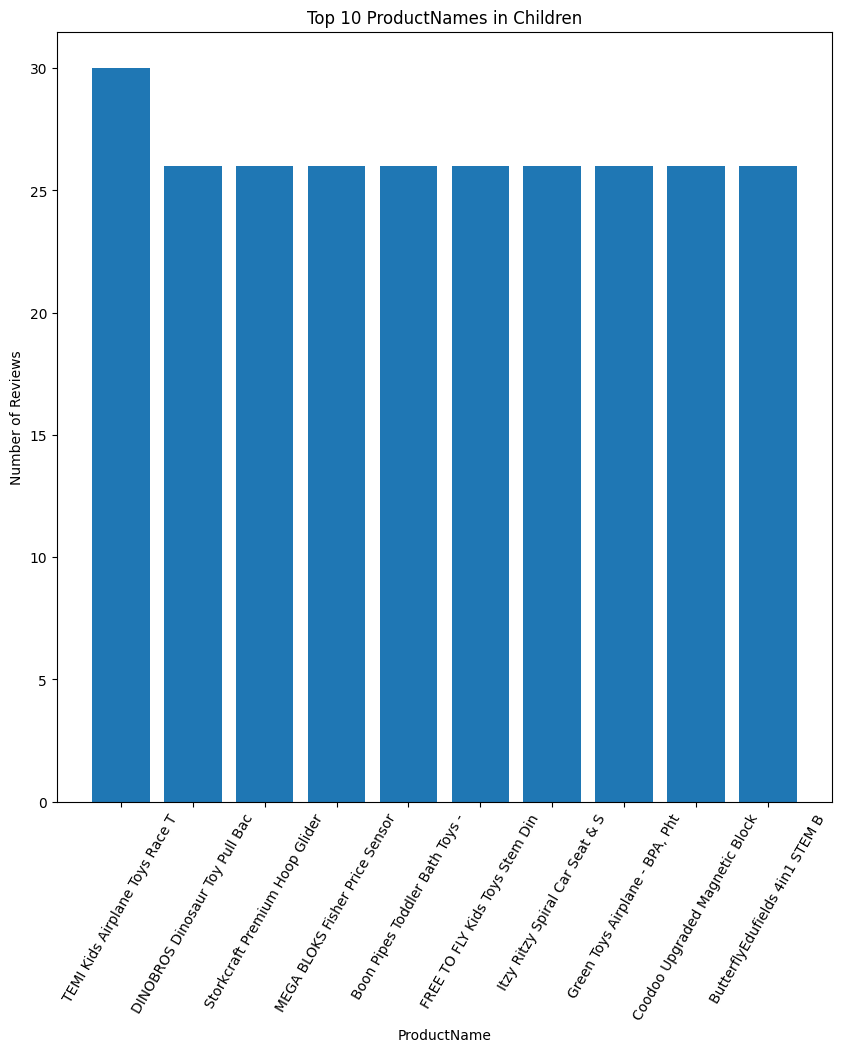

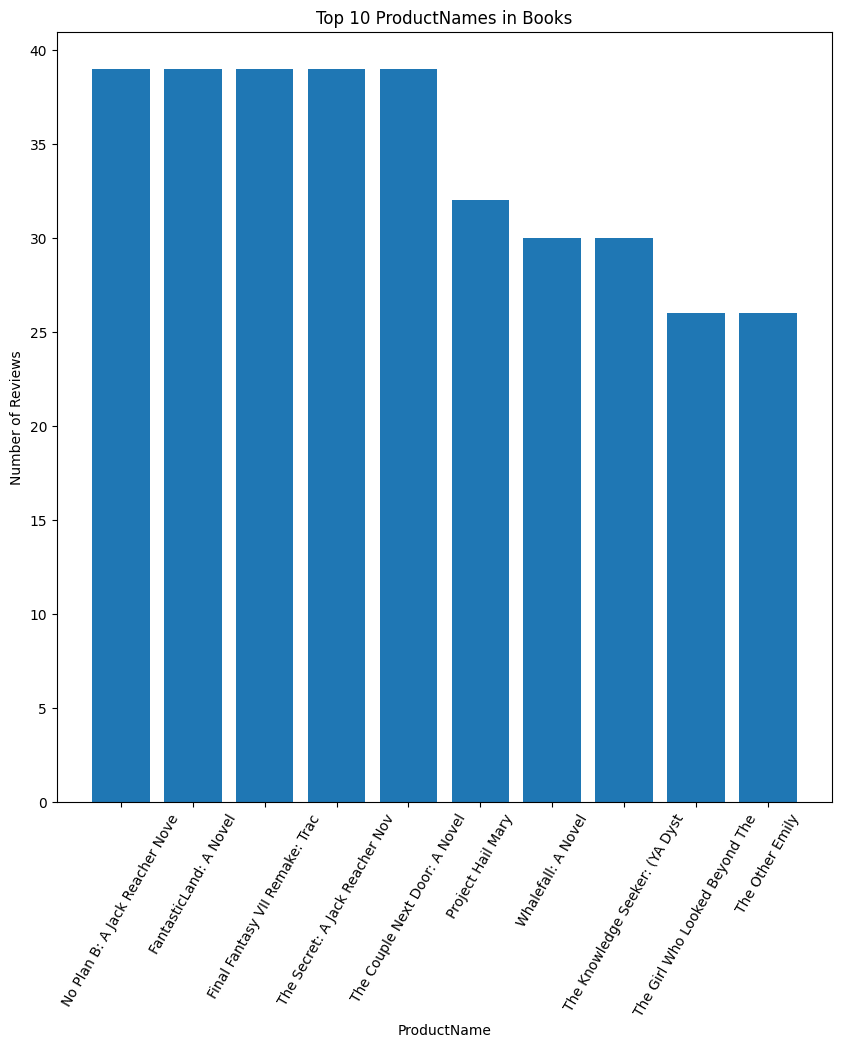

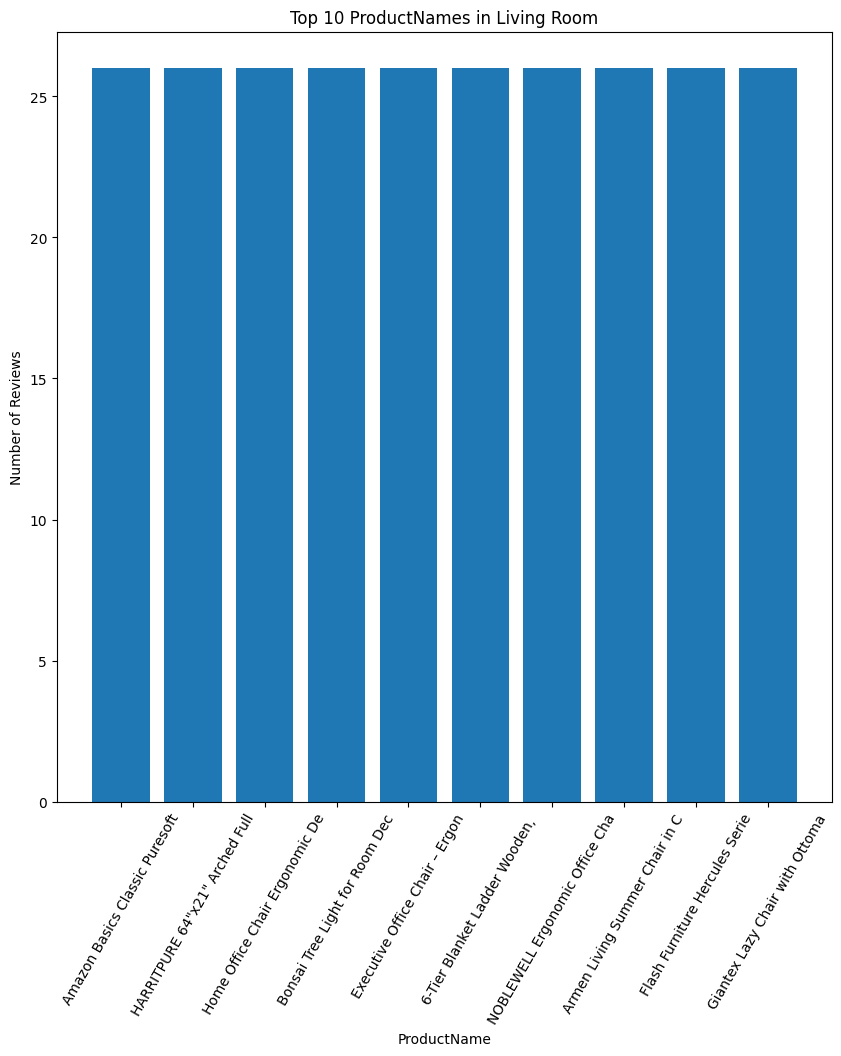

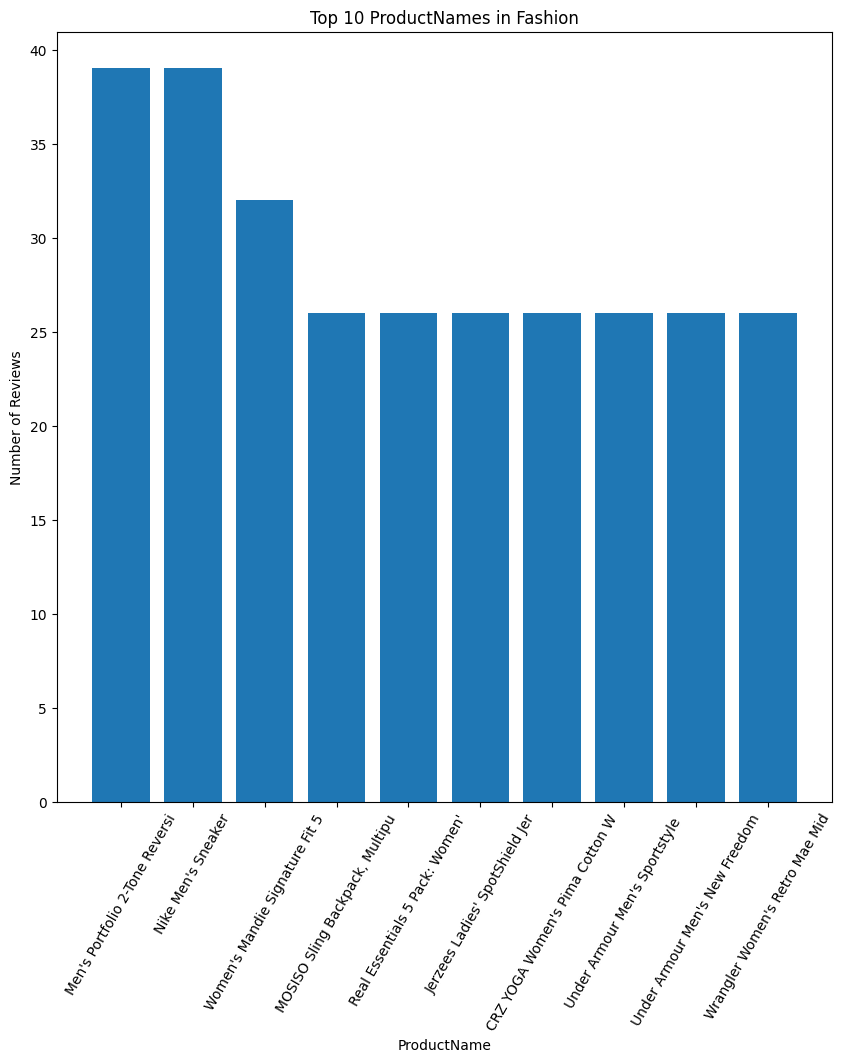

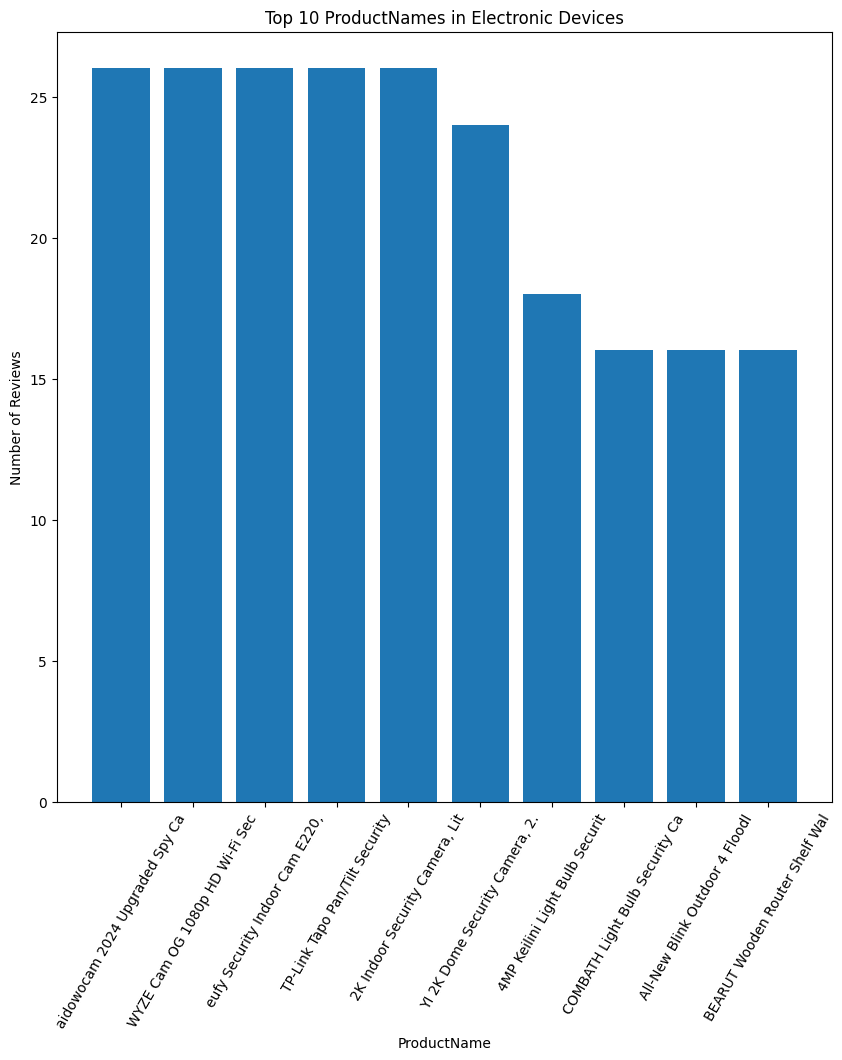

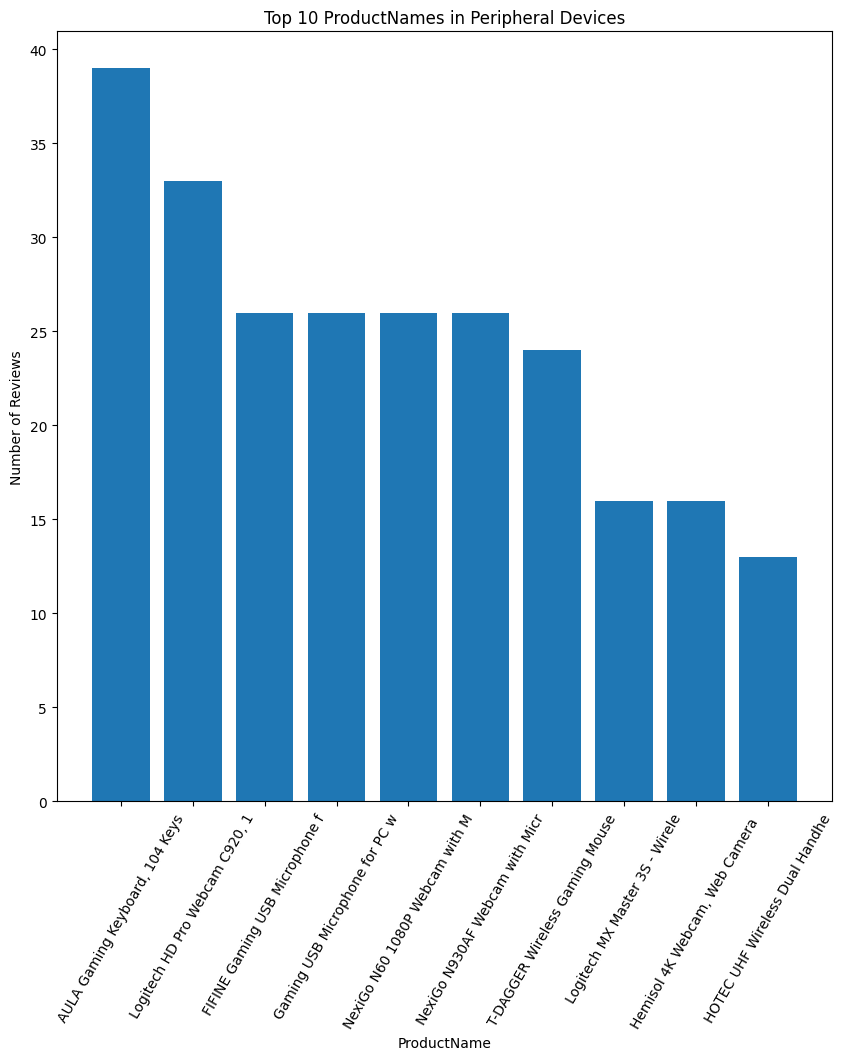

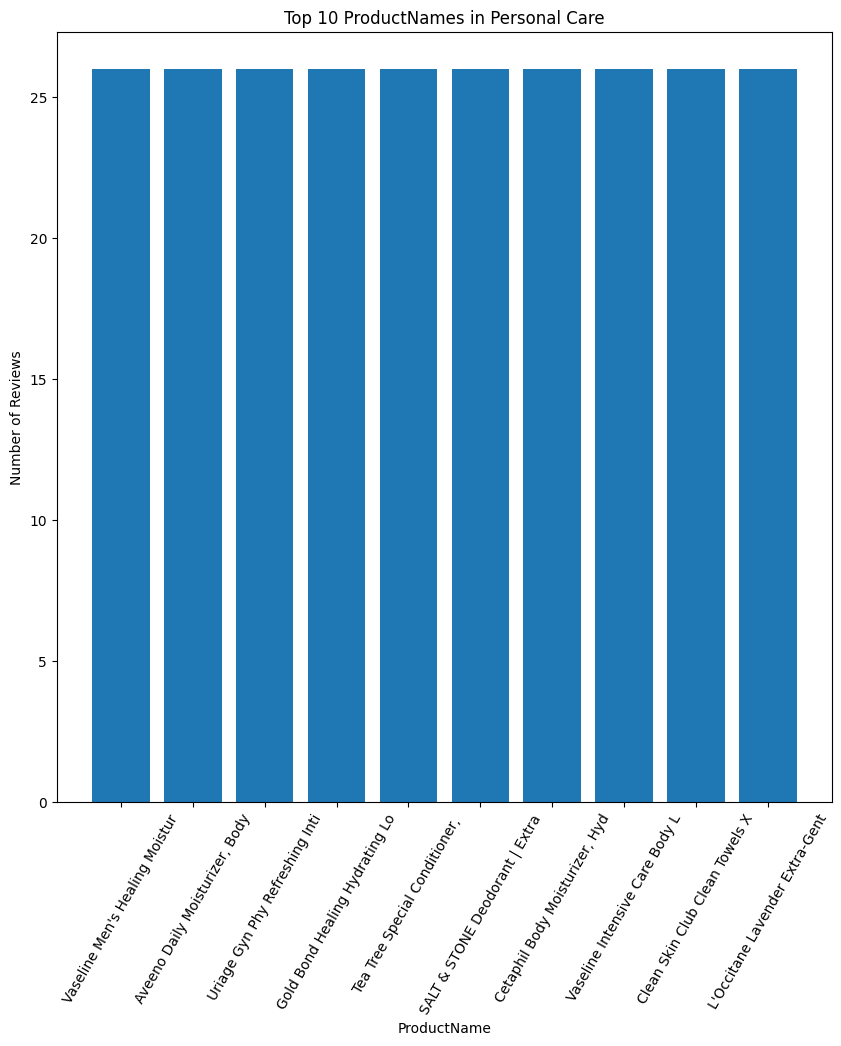

/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120815 (\N{MATHEMATICAL SANS-SERIF BOLD DIGIT THREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120814 (\N{MATHEMATICAL SANS-SERIF BOLD DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120291 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/

In [8]:
# top 10 most reviewed products across categories
for_each_category(
    grouped_by_category_dict,
    "ProductName",
    10,
    "bar",
    xlabel="ProductName",
    ylabel="Number of Reviews"
)

# Top 10 Most Reviewed Products Per Category

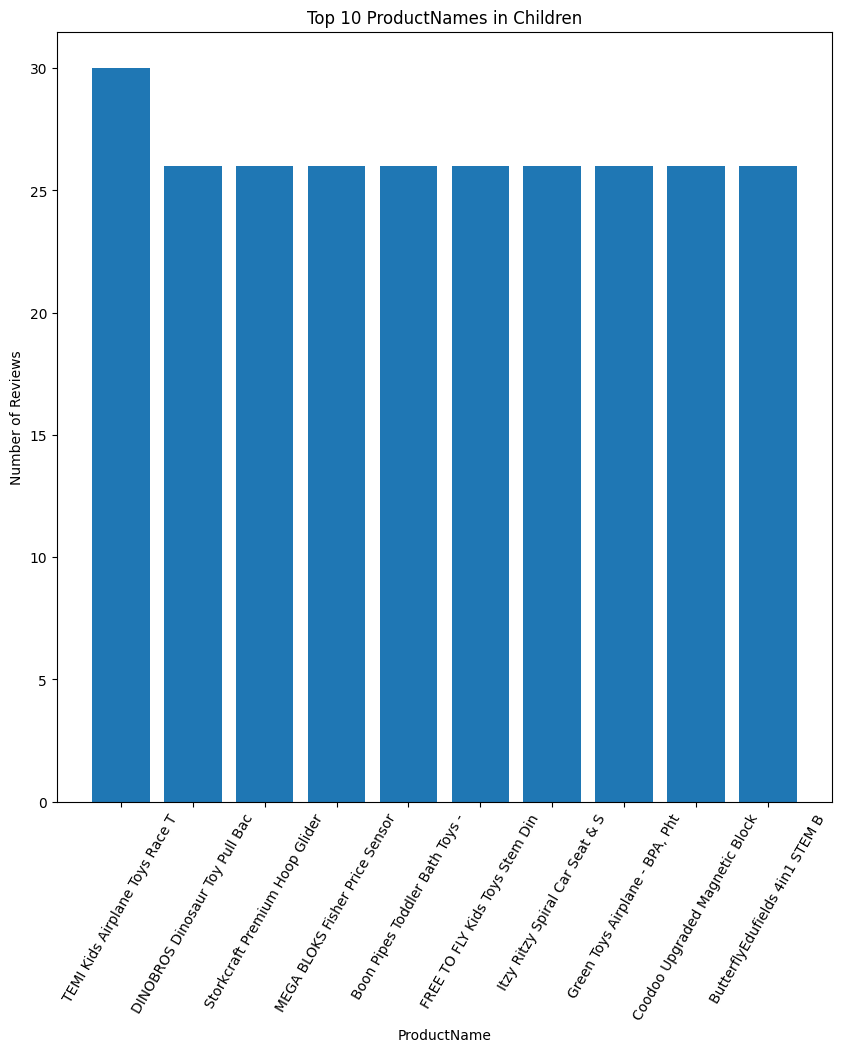

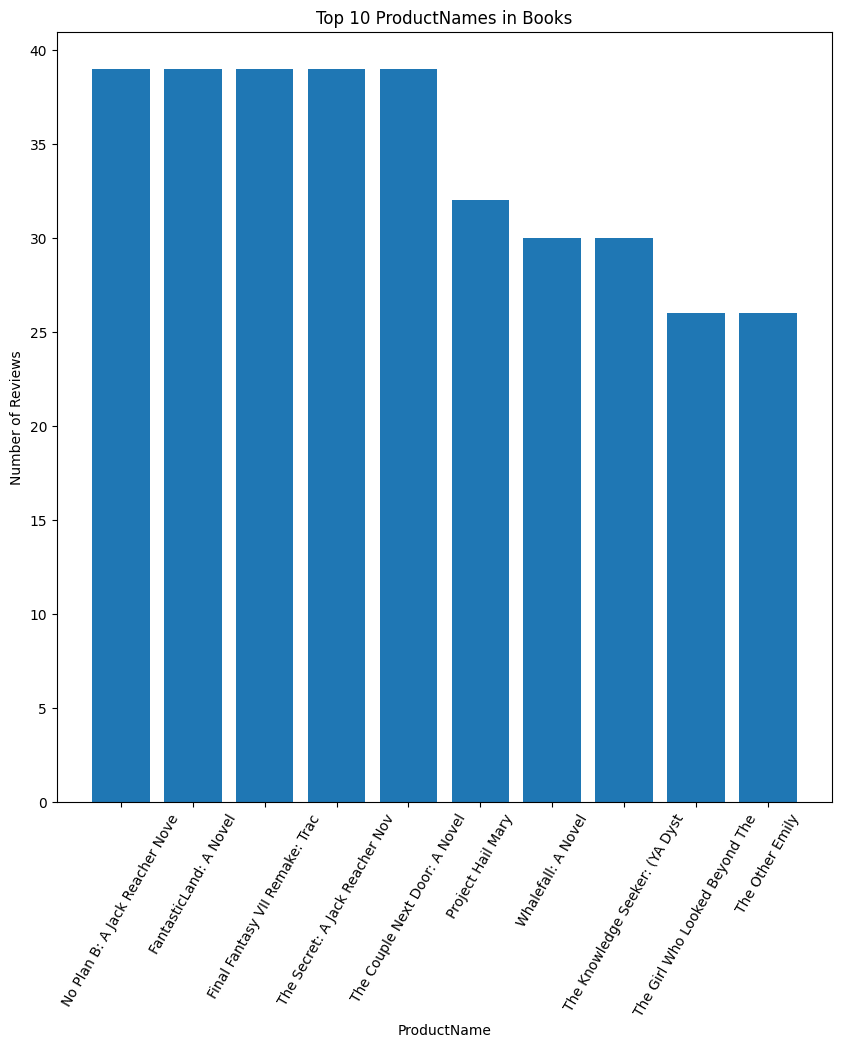

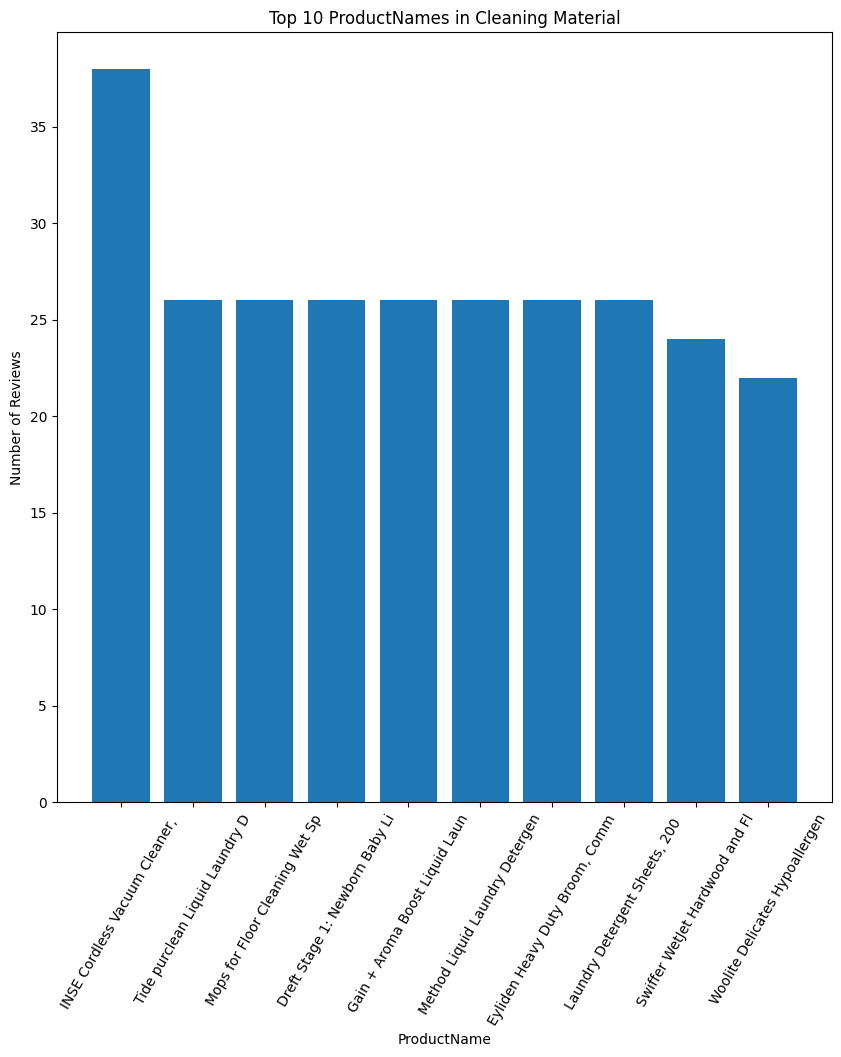

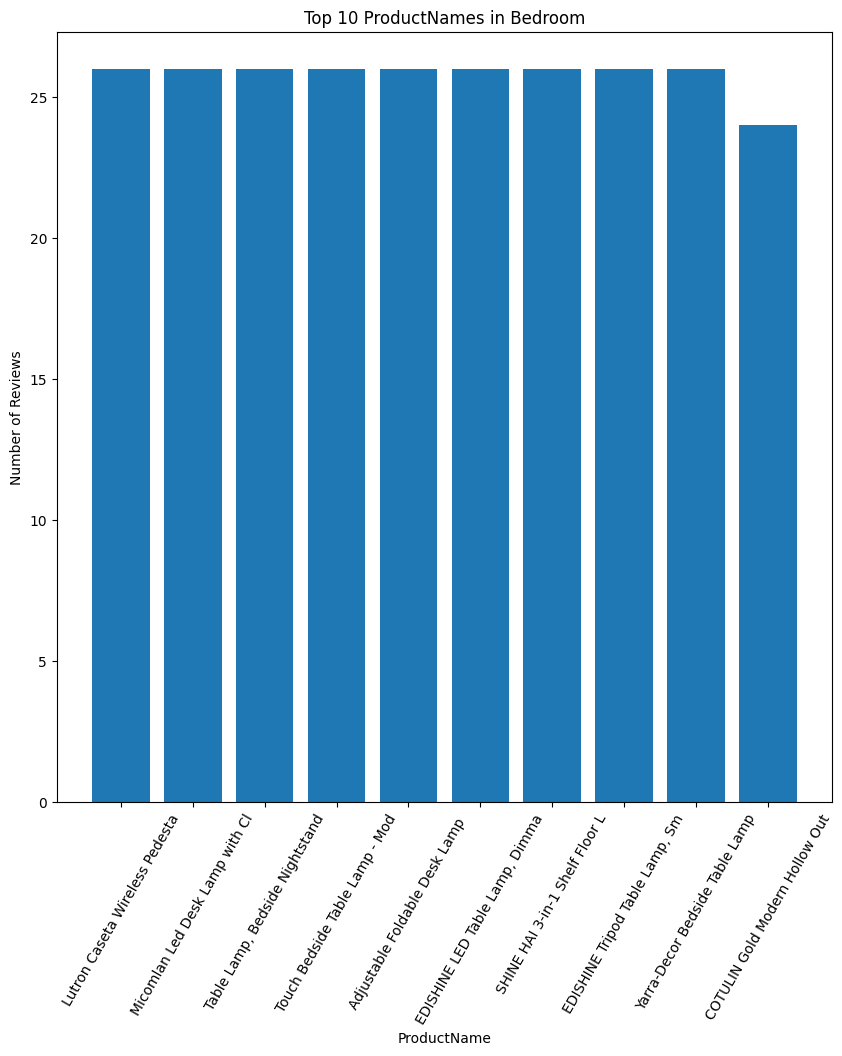

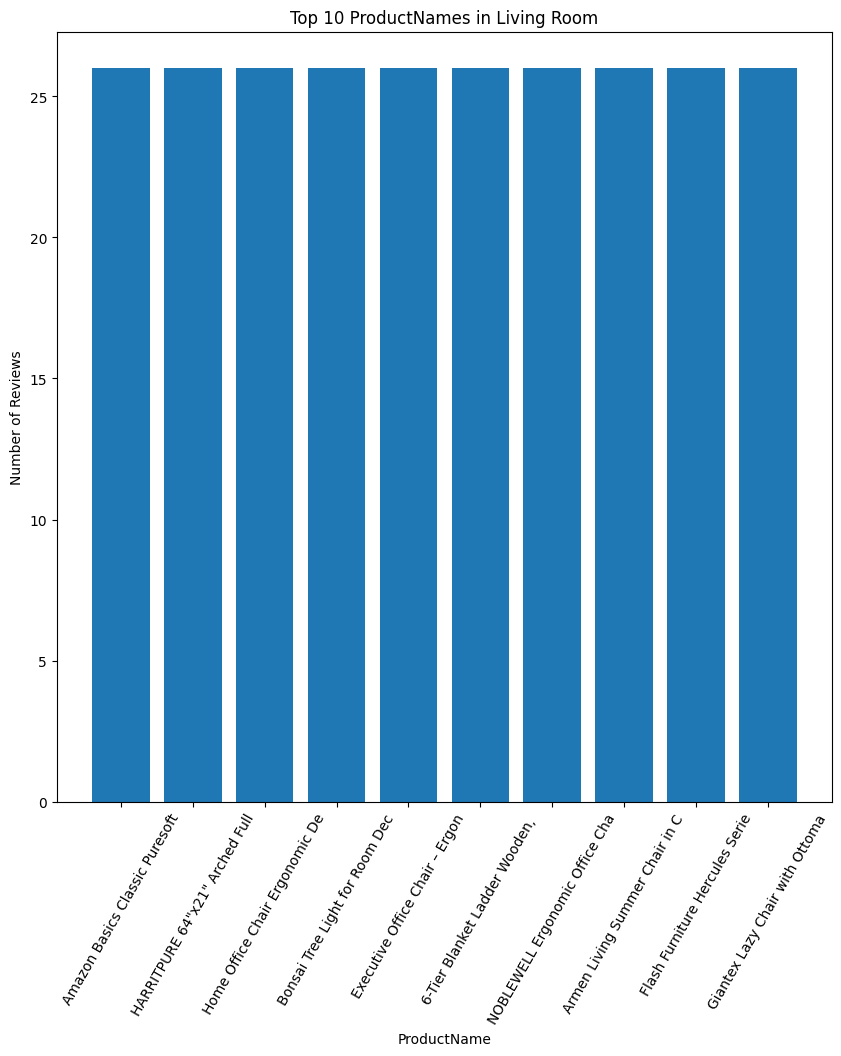

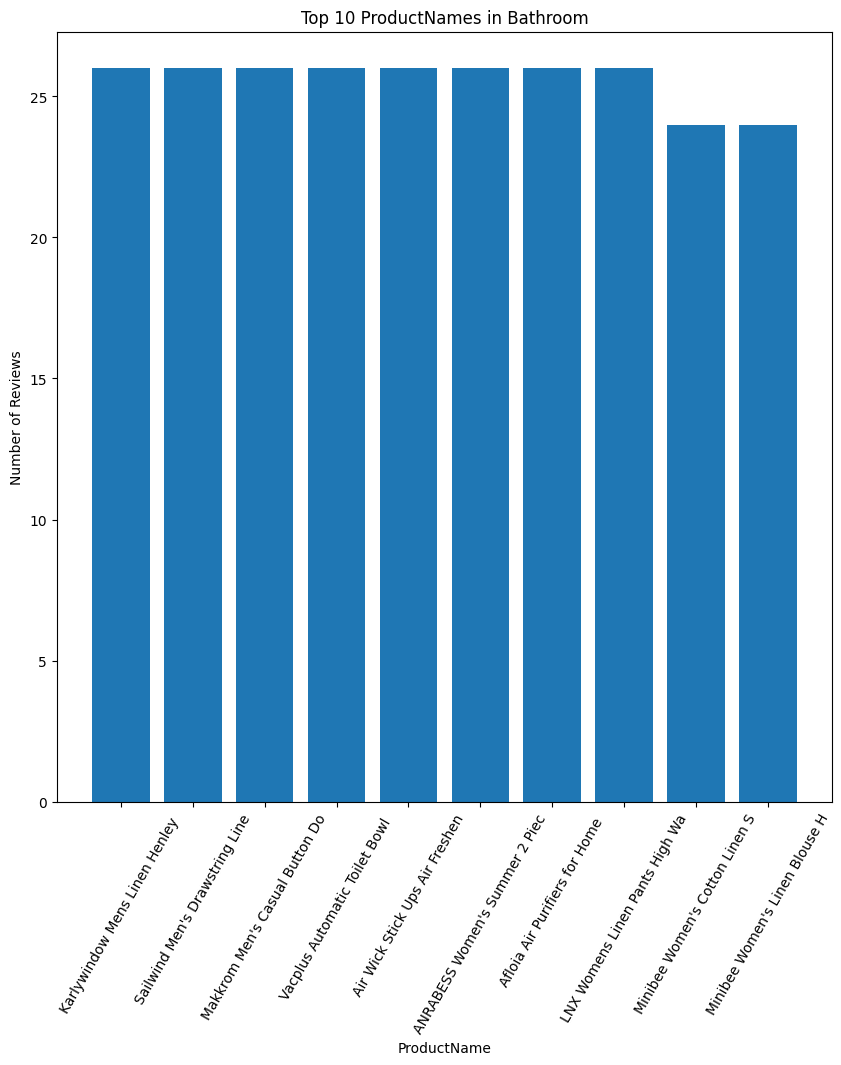

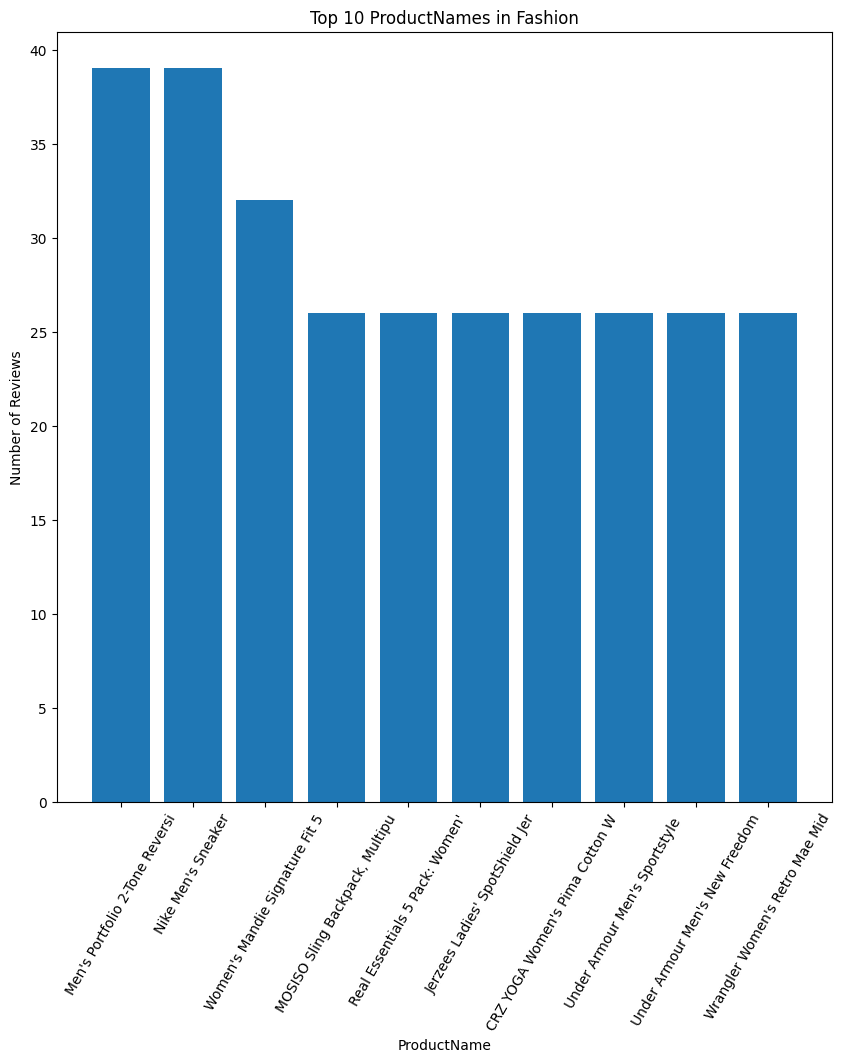

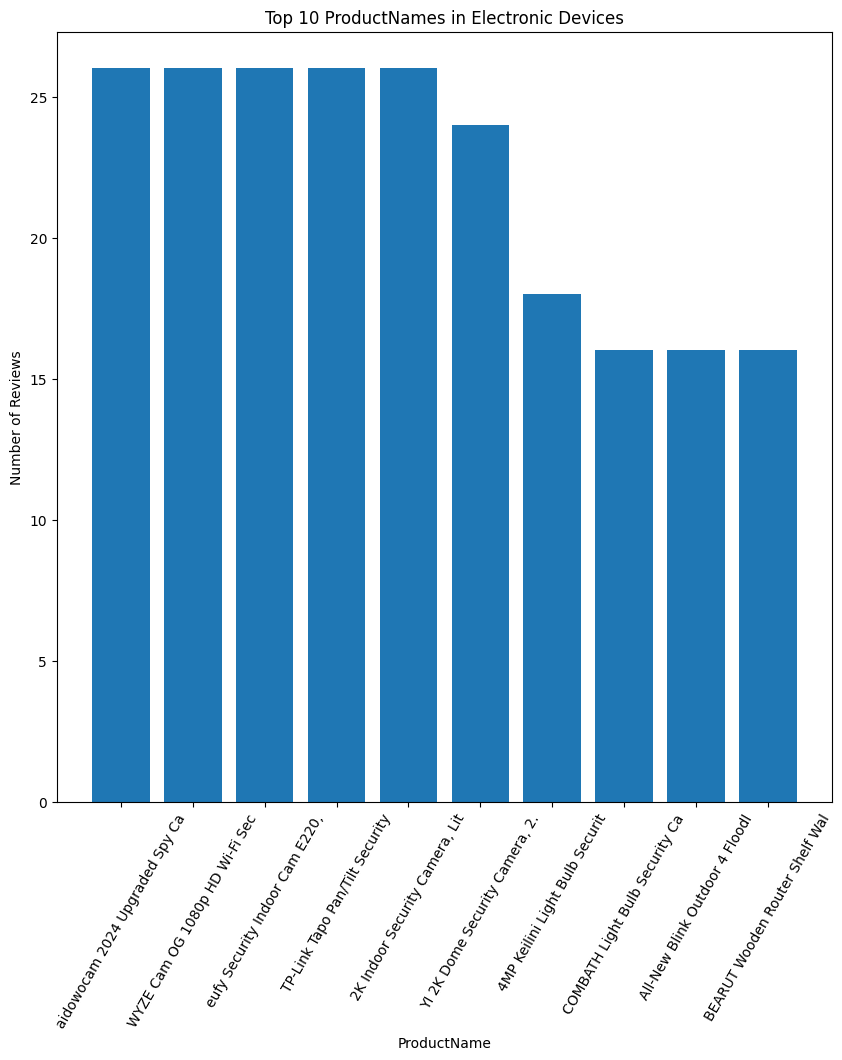

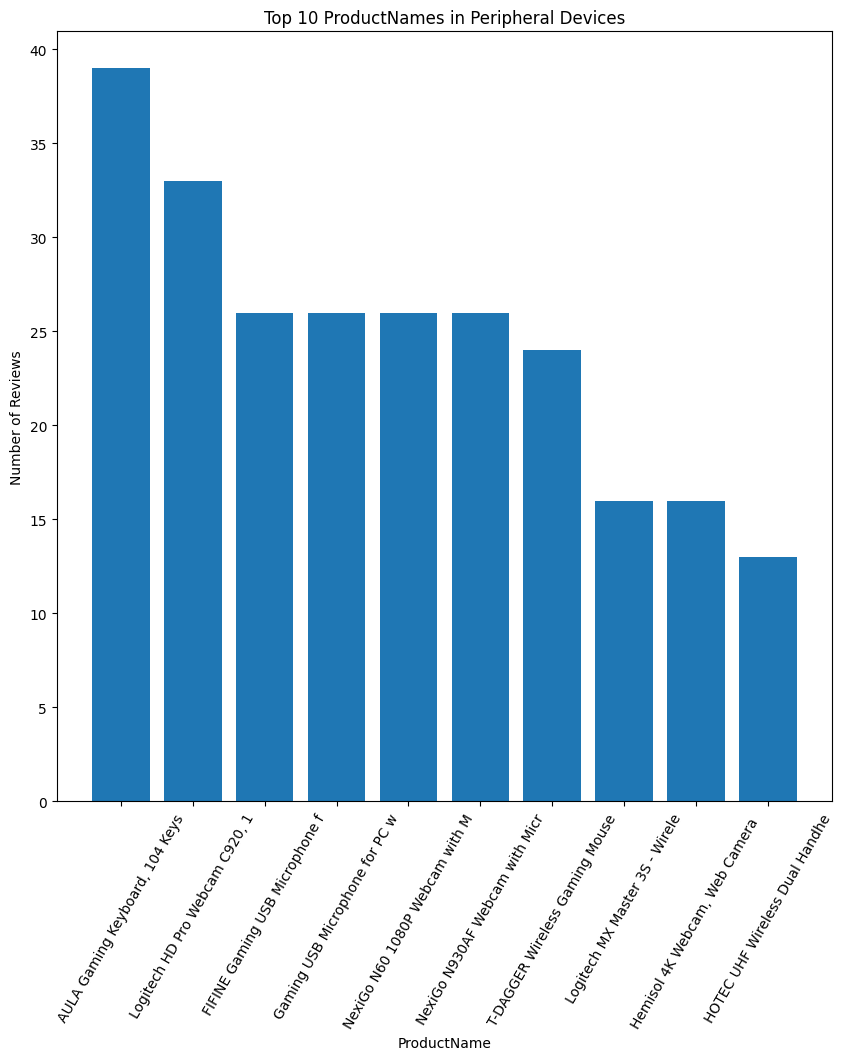

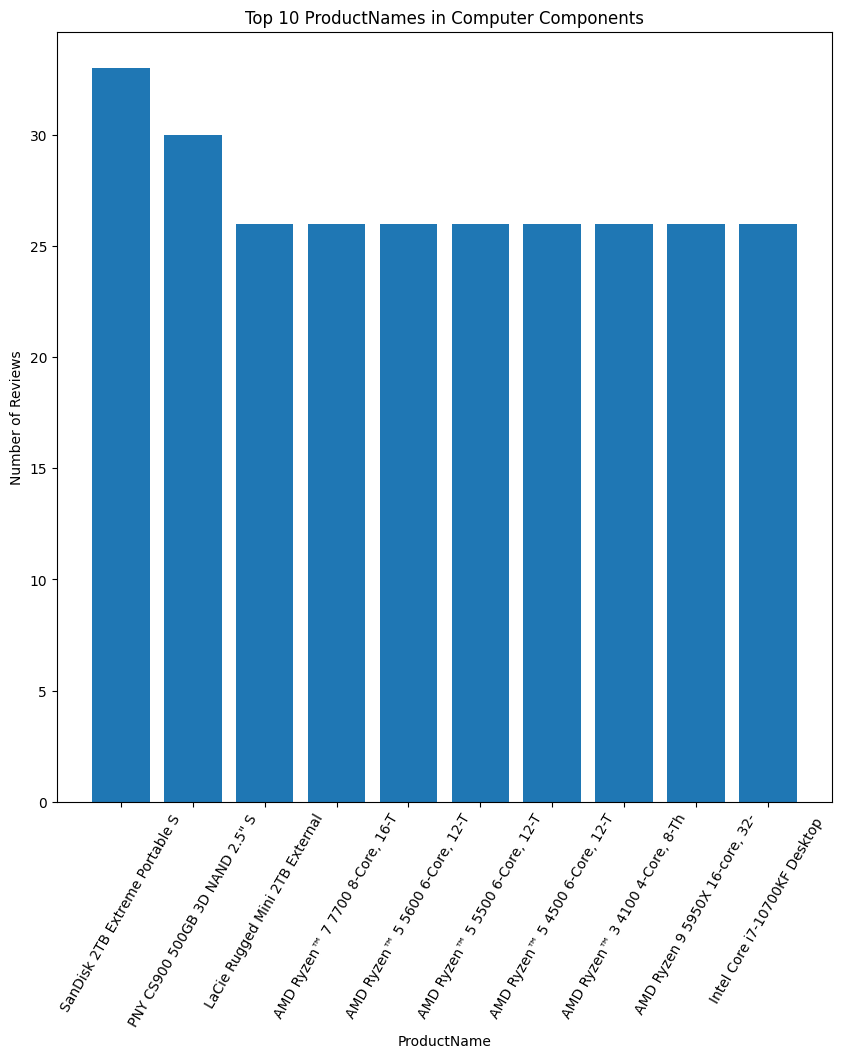

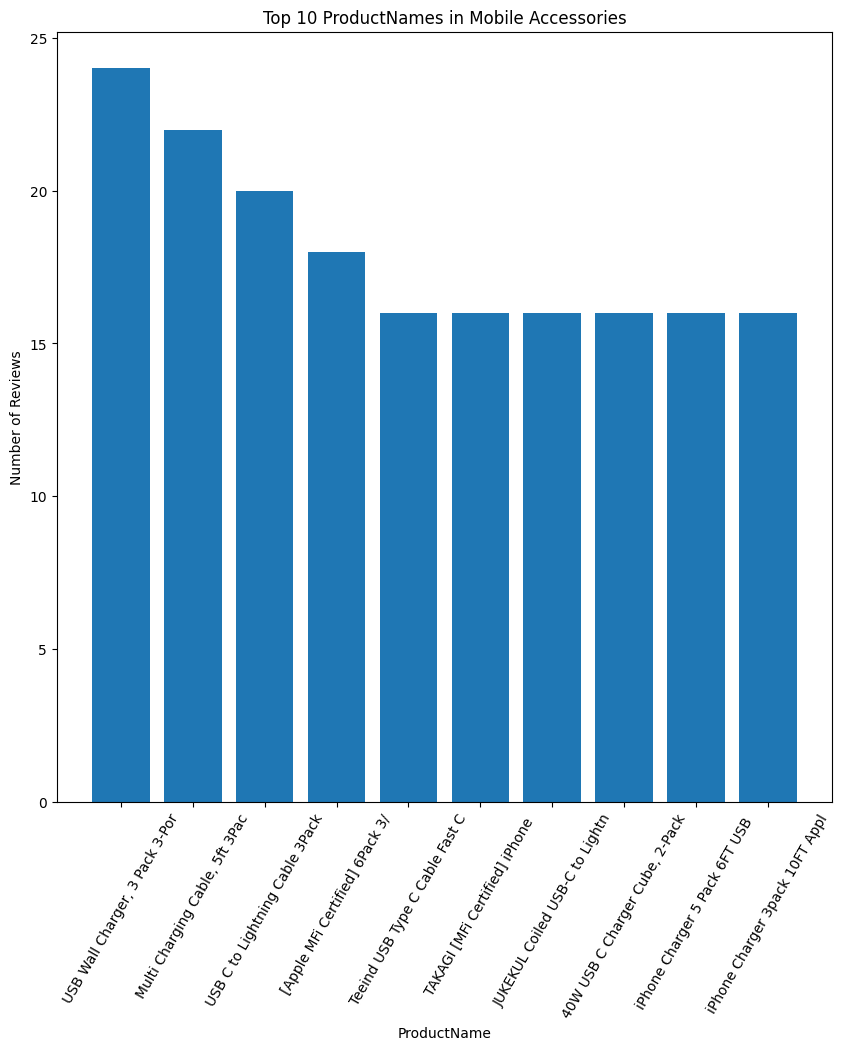

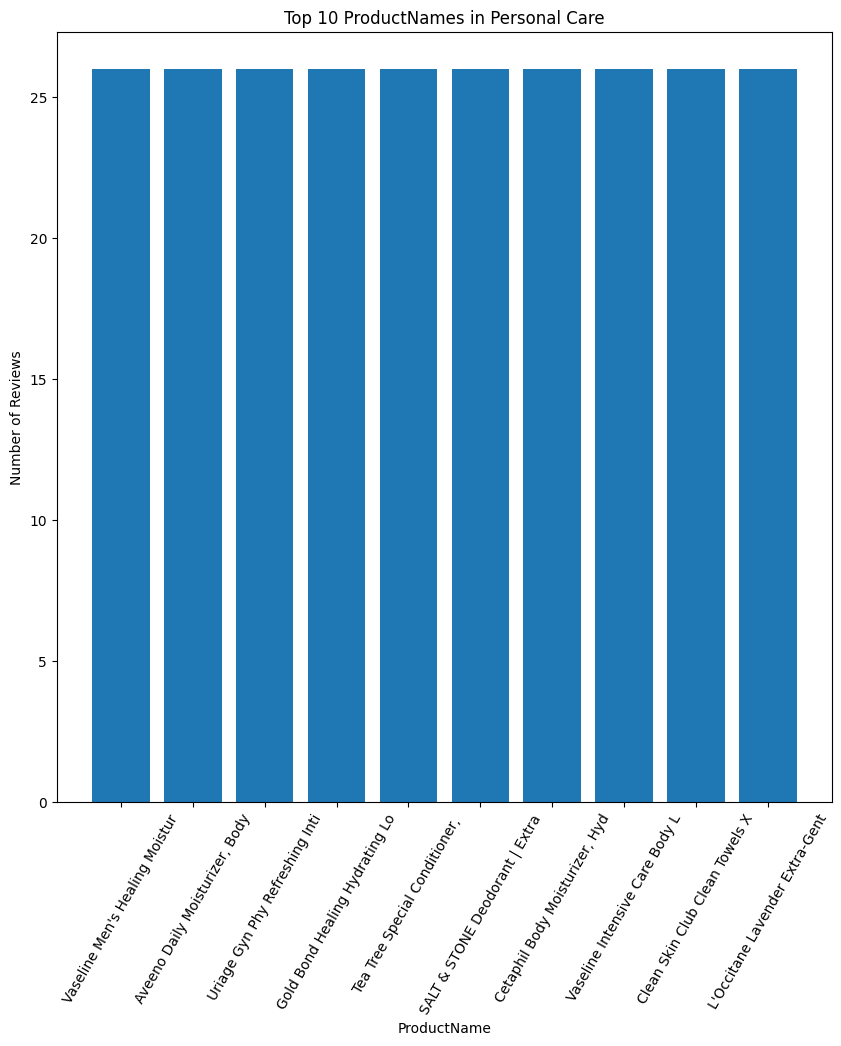

/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120815 (\N{MATHEMATICAL SANS-SERIF BOLD DIGIT THREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120814 (\N{MATHEMATICAL SANS-SERIF BOLD DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120291 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kiana_alessandra/Library/Python/3.11/

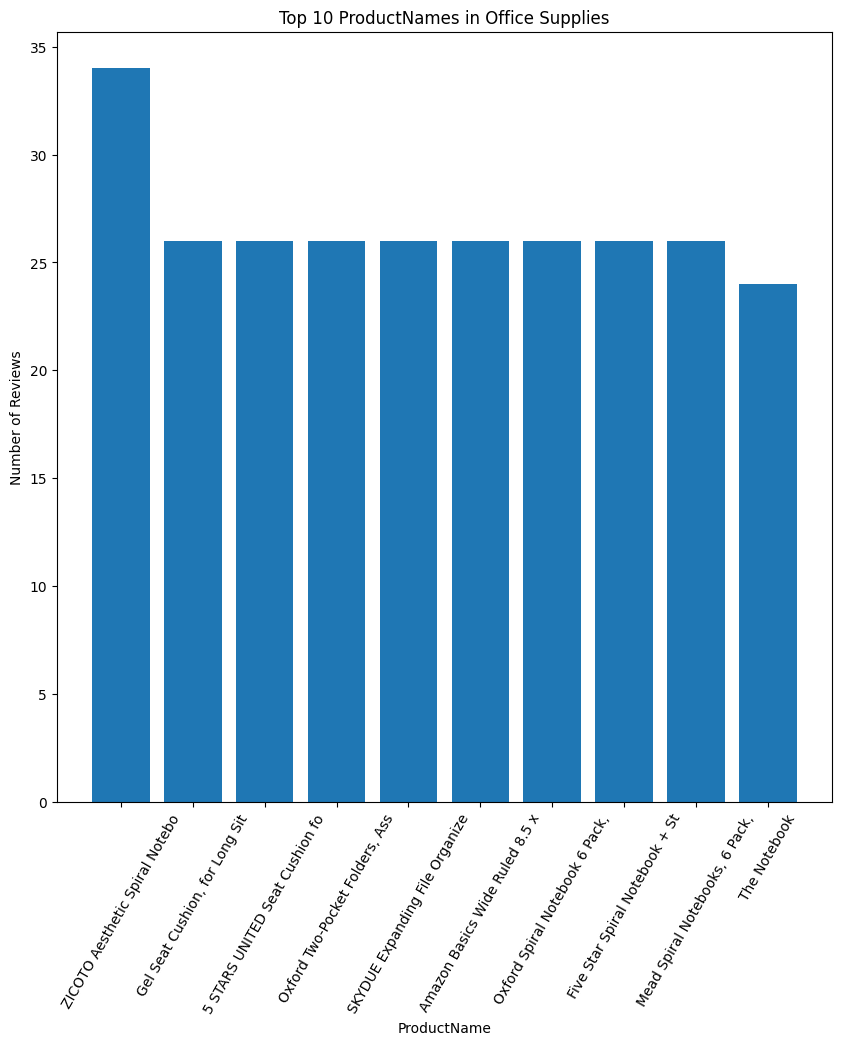

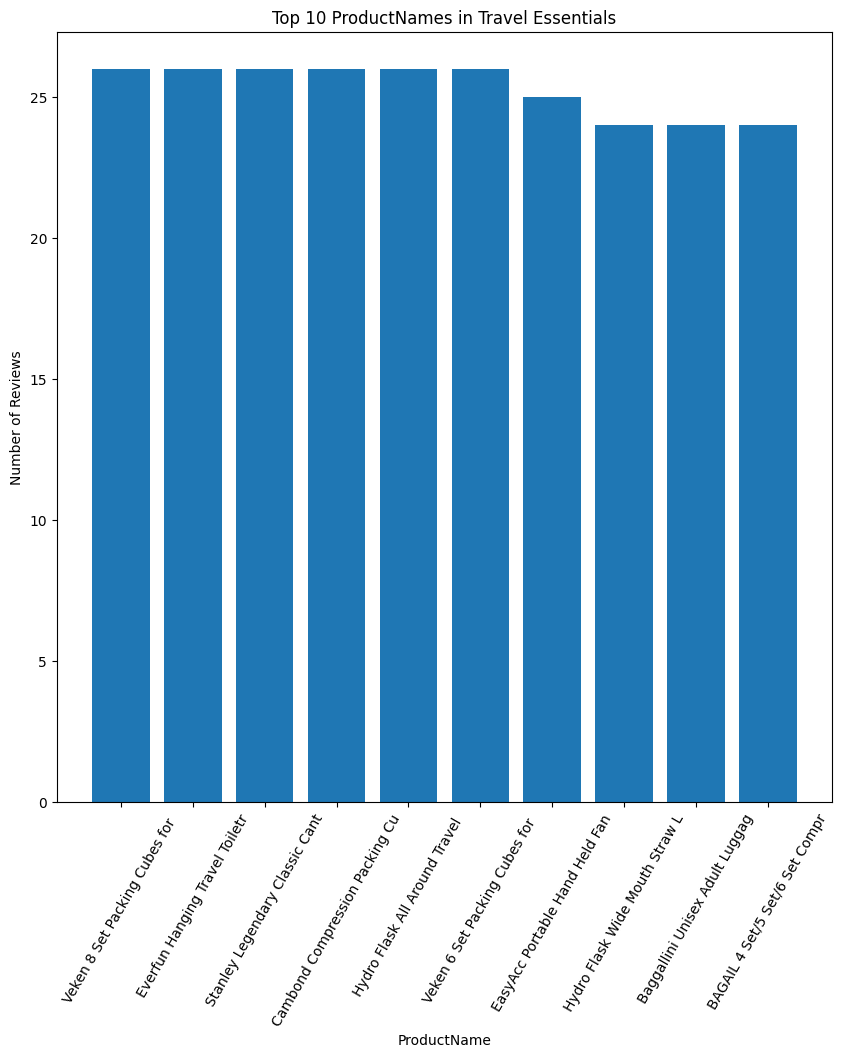

In [9]:
# top 10 most reviewed products across categories
for_each_category(
    grouped_by_category_dict,
    "ProductName",
    10,
    "bar",
    xlabel="ProductName",
    ylabel="Number of Reviews"
)

# Number of Reviews Across Categories

In [10]:
review_counts_per_category = {}
for category in grouped_by_category_dict:
    review_counts_per_category[category] = len(grouped_by_category_dict[category])
plot_bar(review_counts_per_category, "Number of Reviews Across Categories", "Category", "Number of Reviews")

# Average Ratings Across Categories

In [11]:
# show average review rating per category
average_reviews_per_category = {}
for category in grouped_by_category_dict:
    review_counts_per_category[category] = grouped_by_category_dict[category]["reviewRating"].mean()
plot_bar(review_counts_per_category, "Average Ratings Across Categories", "Category", "Average Rating")

# Top 10 Most Upvoted Reviews Per Category

In [12]:
for_each_category(
        grouped_by_category_dict, ["reviewText", "reviewVotes"], 10, 
        "table", xlabel=None, ylabel=None, sortkey="reviewVotes",
        title="Top 10 Most Upvoted Reviews"
)

Top 10 Most Upvoted Reviews in Children


reviewText  reviewVotes                  reviewerName reviewRating                    Location                                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName                FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                                          
AFONENWGNXXIUGGYZKWZ3GPZI36Q                        After trying several different brands and type...          849            FrederickFrederick          5.0               United States                       July 12, 2017  5.0 out of 5 stars Fantastic bottle, with one ...                   True     Comotomo Baby Bottle, Green, 5 Ounce (2 Count)               baby bottle
AFTFDX6Q66PKOISC36VFGNRLSYUA                        Like many other out there, I could decide betw...          735              mommyof3mommyof3          5.0               United States                       June 10, 2016            5.0 out of 5 stars Bjorn vs Guava Lotus                   True      BabyBjörn Travel Crib Light, Silver, One Size                      crib
AG6RSL7GXQCUU2P346IE4RWGGJMQAG6RSL7GXQCUU2P346I...  I am so glad my wife and I bought this travel ...          707                      KrisKris         10.0  United StatesUnited States          March 5, 2015March 5, 2015  5.0 out of 5 stars Best Travel System5.0 out o...                      2  Chicco Bravo Trio Travel System, OrionChicco B...          car seatstroller
AG7NHAT2HSVNIBI6LH5QM6YFK4JQAG7NHAT2HSVNIBI6LH5...  I can't tell you how many times I have switche...          702  FatOrangeTabbyFatOrangeTabby         10.0  United StatesUnited States  September 3, 2012September 3, 2012  5.0 out of 5 stars Finally!5.0 out of 5 stars ...                      2  Baby's Only Organic Sensitive DHA/ARA Toddler ...  baby formulababy formula
AHG5YPN72JJQXCG7463HZYBFRZZQ                        WOW I love this car seat! We have 3 kids (5, 3...          666                    MarieMarie          5.0               United States                    January 25, 2020           5.0 out of 5 stars My favorite car seat!                   True  Graco Extend2Fit 2-in-1 Convertible Car Seat, ...                  car seat
AHHJ5NOCY5EROHZASRCKXZBGLUKQ                        I originally gave this crib 5 stars despite mi...          641                J.M.R. J.M.R.           1.0               United States                      March 12, 2018               1.0 out of 5 stars WARNING DANGEROUS                   True  Dream On Me Synergy 5-In-1 Convertible Crib In...                      crib
AEM67ZLSNV2TH3O4MC7VM7GCXQBA                        I'm going to write the review I wish someone w...          639                  Amanda Brees          5.0               United States                    January 12, 2021  5.0 out of 5 stars The Perfect Infant Carseat ...                   True  Baby Trend Snap N Go EX Polyester Lightweight ...                  stroller
AEB45G7B26CZ6NV5SNZKP5MZBWIQ                        I was going home for lunch at work or had baby...          627      BeachbummamaBeachbummama          3.0               United States                      April 10, 2018                 3.0 out of 5 stars Trial and error                   True            Olababy Gentle Baby Bottle (4oz, Coral)               baby bottle
AFUCQHM2ZKOY6LAFLLHOXZX4OCIQ                        I ordered both the Graco and Summer 3D strolle...          590                    ChrisChris          5.0               United States                     August 17, 2019  5.0 out of 5 stars 3D Mini compared to Graco T...                   True  Summer Infant, 3D Mini Convenience Stroller – ...               



Top 10 Most Upvoted Reviews in Books


reviewText  reviewVotes                      reviewerName reviewRating                    Location                                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName                      FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                                                    
AH6J7323SYEWVEOA7N2T3472QRUA                        “In the future . . . if by some miracle you ev...          926                   Amazon Customer          5.0               United States                     August 30, 2016  5.0 out of 5 stars Everyone Needs to Read This...                   True                                    It Ends with Us                  thriller novel
AHF7I7LZDDTOCHRMHUMOBXHFTKWQ                        As I sometimes do, I’m going to open myself up...          830              C Wm (Andy) Anderson          5.0               United States                  September 10, 2019  5.0 out of 5 stars King Brings Us Back to His ...                   True                             The Institute: A Novel           science fiction novel
AELEL5KOV7YRC2JLBIWKD5EN6YBQAELEL5KOV7YRC2JLBIW...  There are elements that are very good in Teres...          785                    Dee ArrDee Arr          6.0  United StatesUnited States  September 1, 2017September 1, 2017  3.0 out of 5 stars Okay, But Could Have Been B...                      2                 I Am Watching YouI Am Watching You     mystery novelthriller novel
AF4QWSK6PEY7RKELK2WPE7EKPVSQAF4QWSK6PEY7RKELK2W...  Verity opens with author Lowen Ashleigh having...          469                    JHSiessJHSiess          8.0  United StatesUnited States    January 13, 2022January 13, 2022  4.0 out of 5 stars Dark, Twisted, & Shocking -...                      2                                       VerityVerity     mystery novelthriller novel
AHT3Y4SF4IRKJUBDVUPBJXQREA6A                        My ten-year-old reads well above grade level, ...          411                    Mimi Devereaux          5.0               United States                   November 11, 2014    5.0 out of 5 stars This will do the trick! Yay!                   True  Unbroken (The Young Adult Adaptation): An Olym...                nonfiction novel
AHIPEO6ERJ2RQDHM3G7BYKQJWOJA                        I was surprised that there was no full explana...          393                   Ronald H. Clark          4.0               United States                        May 30, 2017  4.0 out of 5 stars Not your usual Michael Cric...                   True                              Dragon Teeth: A Novel                 adventure novel
AEV4SAI37FLJ6NK4M55NWKYVMDAQ                        What book is is important enough that I read i...          389                           Penfist          5.0               United States                    January 31, 2006  5.0 out of 5 stars Should be required reading ...                   True                                            The Law                nonfiction novel
AHRCJXN3FRUKFGYHSWYP5EFJVU6Q                        This book, with its magic, fairytale roots, an...          383      Teisha @ Girl Writes Reviews          5.0               United States                     October 5, 2015  5.0 out of 5 stars Bow Down to the Queen of YA...                   True                        A Court of Thorns and Roses                   fantasy novel
AGFHGZYCE3U2ANH6KIVSOQH6BLOA                        AWESOME writer! Very much reminds me of Mark T...          325                           Matthew          5.0               United States                    December 1, 2020  5.0 out of 5 stars GREAT! But not 



Top 10 Most Upvoted Reviews in Cleaning Material


reviewText  reviewVotes                                       reviewerName reviewRating                    Location                              Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName   FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                                                
AGHKJHRGBRLK3VR6LHNCOVNPMPPQ                        I purchased my home almost a year ago from the...          932                       Kaylah JacksonKaylah Jackson          4.0               United States                   August 26, 2022  4.0 out of 5 stars Old House (1970's) Vs. Stea...                   True  PurSteam 10-in-1 Steam Mop, Floor Steamer with...          mop
AEXP2IBYPZQKMOVKNYX53XVBX5BAAEXP2IBYPZQKMOVKNYX...  I’m very happy with this vacuum. I didn’t have...          870  InnocentBystanderInnocentBystanderInnocentByst...          8.0  United StatesUnited States  October 29, 2019October 29, 2019     4.0 out of 5 stars Yay!4.0 out of 5 stars Yay!                      2  Eureka Home Lightweight Mini Cleaner for Carpe...  broomvacuum
AE3TEON5POB6F6G6OWTNPFHV5XHQ                        A little background. I live with two cats. I h...          563                                       wordsmith246          5.0               United States                 November 25, 2012                          5.0 out of 5 stars Wow!!!                   True  Shark NV501 Rotator Professional Lift-Away Upr...       vacuum
AERKMIVK27WTZSSQNMJIMUXIZCTQ                        If you haven’t heard of the Swiffer you’ve pro...          526                         Ashley ClarkeAshley Clarke          5.0               United States                September 15, 2020  5.0 out of 5 stars Super Convenient But Upgrad...                   True  Swiffer Sweeper 2-in-1 Mops for Floor Cleaning...          mop
AGG7F5264ADJHR4DPNXTZQ65XXOA                        Quick run down of the background here: I have ...          507                                    Ryanna Langkamp          5.0               United States                      June 9, 2021         5.0 out of 5 stars Cut clean time in half!                   True  BISSELL Crosswave Pet Pro All in One Wet Dry V...       vacuum
AGTXHRRRKTQP62HSKLNFNSHX426Q                        My needs - I have a house with laminate floori...          432                                            Wishmom          5.0               United States                     June 28, 2020  5.0 out of 5 stars Perfect little machine - kn...                   True  EUREKA Lightweight Vacuum Cleaner for Carpets ...       vacuum
AFMRAHUFICG3L4AZ2HIIUGTTKOJQ                        You're reading reviews for this vacuum because...          338                 Educated ConsumerEducated Consumer          5.0               United States                     June 27, 2020  5.0 out of 5 stars Unstoppable Machine, Vacuum...                   True  Shark HV301 Rocket Ultra-Light Corded Bagless ...       vacuum
AEWC5ETEWH2EQZGC5A2OVPRERHYA                        We had a 20-yearold Eureka bagless that broke,...          314                                            Craig L          5.0               United States                September 16, 2022       5.0 out of 5 stars This Vacuum Really Sucks!                   True  EUREKA PowerSpeed Lightweight Powerful Upright...       vacuum
AFLFPRUS4VCCXOC5QJJ7GBFQJFVQ                        The media could not be loaded. I have had my r...          307                                                Gia          5.0               United States                    March 23, 2022  5.0 out of 5 stars Amazing robot vacuum and mo...          



Top 10 Most Upvoted Reviews in Kitchen


reviewText  reviewVotes                              reviewerName reviewRating       Location               Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName    FolderName
reviewerID                                                                                                                                                                                                                                                                                                                      
AGHKJHRGBRLK3VR6LHNCOVNPMPPQ  I purchased my home almost a year ago from the...          932              Kaylah JacksonKaylah Jackson          4.0  United States    August 26, 2022  4.0 out of 5 stars Old House (1970's) Vs. Stea...                   True  PurSteam 10-in-1 Steam Mop, Floor Steamer with...       steamer
AG64QPK2SOOKNS7IXKMB7GJ6G7HQ  The media could not be loaded. In the forty ye...          916                      Careful 'n Selective          5.0  United States   February 8, 2017  5.0 out of 5 stars Well-Designed with Superior...                   True  Keurig K-Classic Coffee Maker K-Cup Pod, Singl...  coffee maker
AF47MDVURHHMYHIYMNERNFHZGNWA  Bunn coffeemakers are designed and work differ...          890                              Deep Thought          5.0  United States   January 27, 2019    5.0 out of 5 stars Explainer on how Bunn's work                   True  BUNN 52700 CSB2G Speed Brew Elite Coffee Maker...  coffee maker
AENLOHYWZ2ZY2JI4BPBJZDX4QLNA  Let’s be real, we are talking about a toaster,...          890              John R. BrooksJohn R. Brooks          5.0  United States     March 22, 2018  5.0 out of 5 stars Unexpectedly, I LOVE This T...                   True  Dash Clear View Toaster: Extra Wide Slot Toast...          oven
AFFYECSDSHVFE3JEM3KAYVNFBDZQ  I just cooked a thick ribeye steak using this ...          843                           Kevin K. Fosler          5.0  United States    August 12, 2006  5.0 out of 5 stars Does a good job, things to ...                   True  Lodge L8SGP3 Cast Iron Square Grill Pan, Pre-S...         stove
AHNSKJZEGRHPTKYOCSCKFTC6PCZA  We are about to embark on a European trip and ...          816                                  ssmonroe          4.0  United States      June 15, 2013  4.0 out of 5 stars I purchased this along with...                   True  Conair Travel Steamer for Clothes, Mini Garmen...       steamer
AFG2FNXFLUYZCY7UJQVXPQQHVDUQ  First thing is first. I am a coffee snob.I hav...          797                                     Bryan          5.0  United States     August 3, 2017  5.0 out of 5 stars Buy the wire mesh screen or...                   True  AeroPress Original Coffee Press – 3 in 1 brew ...  coffee maker
AEZOI2Q6V46FCHJQICECNSRCQBTA  I love this toaster oven! After more than 5 ye...          792                            An Avid Reader          5.0  United States      April 9, 2019  5.0 out of 5 stars Love It - 2 Years & Still L...                   True  TOSHIBA AC25CEW-SS Large 6-Slice Convection To...          oven
AG64QPK2SOOKNS7IXKMB7GJ6G7HQ  The media could not be loaded. It’s no secret ...          748  Careful 'n SelectiveCareful 'n Selective          5.0  United States   October 13, 2016  5.0 out of 5 stars Excellent Steamer, Larger W...                   True  URPOWER Steamer for Clothes Steamer, Portable ...       steamer
AF6LM4C4SFKOMP5L7RKUBVUBTG2A  We all have some of these: chipped, scratched ...          655                                 Cardione1          5.0  United States  December 29, 2018    5.0 out of 5 stars EXCEPTIONAL PRODUCT - UPDATE                   True  T-fal Ultimate Hard Anodized Nonstick Fry Pan ...    frying pan



Top 10 Most Upvoted Reviews in Bedroom


reviewText  reviewVotes                                      reviewerName reviewRating       Location                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName FolderName
reviewerID                                                                                                                                                                                                                                                                                                                            
AGHBWJZCAW7LTC5KH6XKQHXQDXEA  I want you to know I saved all the ironing thi...          741                                           Cynthia          5.0  United States    January 27, 2011  5.0 out of 5 stars Finally. An iron that acts ...                   True  BLACK+DECKER The Classic Iron, F67E-T, Aluminu...       iron
AEKXCVYRMH5T3JGZZR3I2UFFTTAA  So I purchased this based on all the amazing r...          481                                    TimothyTimothy          5.0  United States  September 11, 2023  5.0 out of 5 stars OMG!! If I could give a 10 ...                   True  Bedsure Queen Comforter Set Kids - Cooling and...    bedding
AHUHXH2DXBKCFLS3ZQKTKNHPGFEQ  I always passed on taking an iron supplement u...          323                                        Kathryn H.          5.0  United States        May 30, 2019          5.0 out of 5 stars Hope this info helps!!                   True  New Chapter Iron Supplement, Whole-Food Fermen...       iron
AF3KE6E5QASU7BW6IMQR5AMCSLDQ  My favorite sheets EVER and the only ones I us...          322                                            Xannie          5.0  United States   December 24, 2023             5.0 out of 5 stars You NEED these!!!!!                   True  Queen Size 4 Piece Sheet Set - Comfy Breathabl...    bedding
AH7P6XKYFQHX7FGWXI3DXOXVJFJQ  I’m writing this detailed review because I fou...          316                                        GeckoGecko          5.0  United States   November 24, 2022  5.0 out of 5 stars Good price. Very capable iron.                   True  PurSteam Steam Iron for Clothes 1700W with Sel...       iron
AFZHKRL6MR2SJJQSWRXWA3WNJXAQ  Bought the 18" high twin in June 2023 for $74....          273                            TrianglemanTriangleman          5.0  United States       July 11, 2023  5.0 out of 5 stars Sturdy, Portable, Compact a...                   True  Amazon Basics Foldable Metal Platform Bed Fram...   bedframe
AEUQLCSKMIR6VVUJINVJZB3JEJAQ  UPDATE 09/26/2015UPDATE 09/26/2015This lamp is...          243  Mz Nina, business consultant and aspiring artist          4.0  United States      August 1, 2014  4.0 out of 5 stars 9/15/2015 UPDATE: CRI 90+ E...                   True  Dimmable LED Desk Lamp, 4 Lighting Modes (Read...  desk lamp
AHY5HI6AEAHGMYSBYVKTGBJBYMKQ  I'll start by saying I didn't really know what...          222                                           Luis A.          4.0  United States    November 6, 2022  4.0 out of 5 stars A fantastic bed, with a few...                   True  DHP Modern Metal Canopy Platform Bed with Mini...   bedframe
AG2K64LMRWEFV73PAYWBCY7G3EWA  I previously had a radio/alarm clock with batt...          220                                George S.George S.          5.0  United States       June 21, 2022          5.0 out of 5 stars Nice Basic Alarm Clock                   True  Alarm Clock for Bedroom, 2 Alarms Loud LED Big...    bedroom
AEVMVOJ6O6XCUYXHFAHR56WVIOTA  It took me probably a year to buy this duvet. ...          215                                           abk1988          5.0  United States  September 19, 2023                     5.0 out of 5 stars Just try it                   True  MooMee Bedding Duvet Cover Set 100% Washed Cot...    bedding



Top 10 Most Upvoted Reviews in Living Room


reviewText  reviewVotes                                  reviewerName reviewRating                    Location                      Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName      FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                                      
AH6E5Q77BOF4P47UEKRTCCMZ65NQ                        Cliff notes*************It's great assuming yo...          897                    Drew LankfordDrew Lankford          5.0               United States        September 11, 2019  5.0 out of 5 stars Works great and great piece...                   True  Certified Refurbished Ring Video Doorbell Pro,...   ring doorbell
AHHZRCW7BN4QG7MPTVBOLBEDHVJA                        I’ll start by saying that I really don’t like ...          697                    James PartlowJames Partlow          4.0               United States             June 24, 2019  4.0 out of 5 stars Best Spray Mop I've Used (A...                   True  Rubbermaid Reveal Spray Microfiber Floor Clean...      home decor
AHFYU46NNWH6FBYAUFC62DJBWOMQ                        I own a rather shameful number of nice high he...          508                  She Buys StuffShe Buys Stuff          4.0               United States           January 5, 2013  4.0 out of 5 stars Sturdy shoe rack, with some...                   True     Whitmor 4 Tier 20 Pair Floor Shoe Rack - White       shoe rack
AHUDER4YU23PODC6UVAHFHLTKMZA                        I have good number of cameras, doorbells, and ...          488                                    Ryan Dubbs          5.0               United States             June 21, 2023        5.0 out of 5 stars These things just work!!                   True  Ring Video Doorbell – 1080p HD video, improved...   ring doorbell
AGECA5JYDDJFWZITXFBTF7RJSD7Q                        I am updating my review from below because its...          432                                        John H          5.0               United States            August 3, 2017  5.0 out of 5 stars Review updated - Now it wor...                   True                          Ring Video Doorbell Elite   ring doorbell
AEW42PDR3JOWZUSZZSH42TRLNB7Q                        After researching automated light switches and...          403                      Jorge JuarezJorge Juarez          5.0               United States             April 1, 2017  5.0 out of 5 stars Instructional Review: Tiny ...                   True  Kasa Smart Plug Classic 15A, Smart Home Wi-Fi ...      home decor
AG5NRZTE3PNCMLP77YECCYIA43GA                        In my opinion this is a good quality product w...          333                           Kelly R. - Michigan          5.0               United States            April 17, 2022     5.0 out of 5 stars Bad Reviews Are Sour Grapes                   True  USX MOUNT UL Listed Full Motion TV Mount, Swiv...      wall mount
AEQSXYOW62CFXQKKD4UMLEKLJR7A                        I had the Ring 2 before this and it would not ...          274                                      Bo's Dad          5.0               United States           August 14, 2022  5.0 out of 5 stars Love it! Upgraded from the ...                   True  Ring Wired Doorbell Pro (Video Doorbell Pro 2)...   ring doorbell
AGI3EZWWHBQJAOF3UP2USMJQHIIQAGI3EZWWHBQJAOF3UP2...  I have a special use for this and it will prob...          266                      Scott CondorScott Condor         10.0  United StatesUnited States  July 1, 2017July 1, 2017  5.0 out of 5 stars Good, well made curtains. I...                      2  No. 918 Montego Casual Textured Semi-Sheer Gro...  curtaincurtain
0                               



Top 10 Most Upvoted Reviews in Bathroom


reviewText  reviewVotes                                reviewerName reviewRating       Location                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName       FolderName
reviewerID                                                                                                                                                                                                                                                                                                                            
AH2SXLFHKJWAXTIE4JAW6QRLZQEQ  I bought this air purifier to replace a cheapl...          982        george_was_curiousgeorge_was_curious          5.0  United States         May 9, 2016  5.0 out of 5 stars 5/5 - would recommend this ...                   True  GermGuardian Air Purifier for Home, Large Room...     air purifier
AFHHFQUME6FVGGJHG4OARLVWDB4A  *This is a HONEST review from a real buyer! I ...          891                                       Jacks          5.0  United States   November 18, 2022  5.0 out of 5 stars Great for side sleepers and...                   True  Sidney Sleep Pillow for Side and Back Sleepers...           pillow
AHCVY7YXRNGQLQVHHAM5EOK6FO7A  I was initially hesitant to buy a mattress onl...          863                                         Suz          5.0  United States  September 10, 2018               5.0 out of 5 stars Folks, it's legit                   True  Vesgantti Full Mattress 10 Inch Innerspring Mu...         mattress
AHQVO4FUFTQ3OLKB43HR3P2SSDPA  Update! (My original review is below)After usi...          802                                     CaroleO          4.0  United States   February 13, 2022  4.0 out of 5 stars Terrific little washer as l...                   True  SUPER DEAL Compact Mini Twin Tub Washing Machi...  washing machine
AHS5Q7KISWRCHAGBK3TDVIKYBDWQ  I let it fluff up a few days in a spare bedroo...          793                                           g          5.0  United States        May 12, 2020  5.0 out of 5 stars Wasn’t sure at first but oh...                   True  Beckham Hotel Collection Bed Pillows Standard ...           pillow
AGKVJKVB52SXQCSALHIJGXQ77ZWQ  An air purifier is not a complicated device. I...          792                                      team W          4.0  United States       June 19, 2023  4.0 out of 5 stars Cost effective for small sp...                   True  LEVOIT Air Purifier for Home Allergies Pets Ha...     air purifier
AHW5JLHIHOKPBJIZE5JSBJTSHHOA  First of all, this is a really great product. ...          656  Heather A. LiddingtonHeather A. Liddington          4.0  United States   December 20, 2019  4.0 out of 5 stars Really gets your clothes cl...                   True  SUPER DEAL Portable Washing Machine 17.6 lbs T...  washing machine
AHTDYS75UNLW43PVRCEMNODLUYKA  The media could not be loaded. This is now our...          655                            Angie C.Angie C.          5.0  United States       June 30, 2021  5.0 out of 5 stars This purifier is amazing! A...                   True  BLUEAIR Bedroom Air Purifier, Air Cleaner Dust...     air purifier
AHCRDHMP3REBO7QPAXJGZHK7WSZQ  If you are looking for One Incredible Body pil...          651                                  TexanTexan          5.0  United States   December 11, 2015  5.0 out of 5 stars Most. Incredible. Body. Pil...                   True  Snuggle-Pedic Body Pillow for Adults - White P...           pillow
AFXHLHROSFTKZBAB5UYZUULVEAXA  EDIT: 3 month update.....I'm still leaving it ...          648                                      Zooper          5.0  United States   December 21, 2017  5.0 out of 5 stars Great mattress. Comfortable...                   True  ZINUS 10 Inch Green Tea Memory Foam Mattress, ...         mattress



Top 10 Most Upvoted Reviews in Fashion


reviewText  reviewVotes                reviewerName reviewRating       Location                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName       FolderName
reviewerID                                                                                                                                                                                                                                                                                                            
AHLL6ZRPR7PKK4N73UUNGQVLQMOA  I don't like shapewear lol. I have worn the on...          993                        Elan          5.0  United States      March 25, 2023                      5.0 out of 5 stars *OBSESSED*                   True  SHAPERX Bodysuit for Women Tummy Control Shape...  workout clothes
0                             Ok so I’m 5’7 160lbs and have 34 DD and I orde...          956            Allison Maclaren          5.0              0                   0                             It’s gonna look tiny!!                   True  SHAPERX Bodysuit for Women Tummy Control Shape...  workout clothes
AGGBYJDFUNIQL7ZQMZEU3AZOFBZQ  So I decided to post pictures with this review...          855                  B & LB & L          5.0  United States       March 1, 2020  5.0 out of 5 stars Seriously HAPPY 😊 with my f...                   True  INNERSY Womens Underwear Cotton Hipster Pantie...        underwear
AFKR2K7BOZI3YGYAIV7C5RABPUQQ  I think most ladies can agree with me when I s...          840                     Lexy N.          4.0  United States       March 1, 2018          4.0 out of 5 stars My new favorite jeans!                   True  Levi's Women's 311 Shaping Skinny Jeans (Also ...      women jeans
AG3SDYM5QR4KELRX3WPRA4Q7TS4A  Columbia makes some fantastic shirts, but make...          513              Gravity's Gone          4.0  United States  September 24, 2015  4.0 out of 5 stars Comparison of Columbia Tami...                   True        Columbia Men's Bahama Ii Short Sleeve Shirt        men shirt
AHJ2OJUE2NRH2NTRPVUHZZJQ7LCA  Detailed review ahead (girl, be ready for a no...          487              Sarah SSarah S          5.0  United States        May 28, 2023  5.0 out of 5 stars I will live in these all su...                   True  THE GYM PEOPLE Womens' Sports Bra Longline Wir...  workout clothes
AFGJDWPC3FIRG3WVH3ANYZM4HQIA  Fabulous! I'm SO relieved! I NEVER wear skinny...          405      LeighLeibenLeighLeiben          5.0  United States    January 17, 2017  5.0 out of 5 stars The First Skinny Jean I've ...                   True  Signature by Levi Strauss & Co. Gold Label Wom...      women jeans
AF77INXDY5UTXEY6AL4ZZUFV4IMQ  The media could not be loaded. TLDR for short ...          400  Denise SheetsDenise Sheets          4.0  United States    October 27, 2023                           4.0 out of 5 stars Nice!                   True  THE GYM PEOPLE Thick High Waist Yoga Pants wit...  workout clothes
AHCG2QIM5JD4LIU4SRG535HTA77Q  These are very comfortable and secure fitting,...          373                        3262          5.0  United States     August 12, 2021  5.0 out of 5 stars Comfortable and hardly any ...                   True  3M Aura Particulate Respirator 9205+ N95, Ligh...        face mask
AE2RUXEH73IN3AMZIFUBYXPVEEFA  I'm long winded, so I'll give you the punchlin...          357                  egr13egr13          5.0  United States        May 15, 2022  5.0 out of 5 stars Excellent Value + 5-Layer c...                   True  Funight KN95 Face Masks 50 Pack 5-Ply Breathab...        face mask



Top 10 Most Upvoted Reviews in Electronic Devices


reviewText  reviewVotes        reviewerName reviewRating                    Location                              Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName              FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                            
AEKC53CLQ6Z2HJTSSNHS3R3V6UDA                        I found this router through a third party webs...          943           Tech Dude          5.0               United States                   October 3, 2016  5.0 out of 5 stars Excellent Router that Punch...                   True  tp-link WiFi Router AC1750 Wireless Dual Band ...             wifi router
AE5KEXVGYOIDY5KRV2RC3HHBSYNA                        So, getting older in life, and still have a ve...          886                  MD          5.0               United States                    April 10, 2018        5.0 out of 5 stars Convenient Fitness Gear!                   True  Sunny Health & Fitness Mini Stepper for Exerci...                 monitor
AEOYQ6V2IOKOPRT4TUV362ZORGJA                        There are many routers claiming to be fast and...          882        Prateek Garg          5.0               United States                      May 23, 2021   5.0 out of 5 stars Perfect router for most users                   True  TP-Link AX5400 WiFi 6 Router (Archer AX73)- Du...             wifi router
AFASU5KA65TSQAXJQS4V4DT6NLUQ                        I got the TP-Link N300 Travel Router (without ...          842        sorarisorari          5.0               United States                    April 30, 2017  5.0 out of 5 stars Got this for my Xbox One S....                   True  TP-Link N300 Wireless Portable Nano Travel Rou...             wifi router
AFXGWFLGA3VHT336XWKNQGZ2YV6AAFXGWFLGA3VHT336XWK...  I have a Fitbit Charge 2 I've used to track my...          823  Wolf*StarWolf*Star         10.0  United StatesUnited States  October 15, 2020October 15, 2020  5.0 out of 5 stars The Best Economy Smart Watc...                      2  Popglory Smart Watch, 1.69'' Fitness Watch Wom...  smart watchsmart watch
AEHL7BB7GOOWFA773QUOELKNUIQA                        I had been an IT professional for over 40 year...          785             Judy L.          5.0               United States                     June 26, 2021  5.0 out of 5 stars As an IT professional for o...                   True  Google Wifi - AC1200 - Mesh WiFi System - Wifi...             wifi router
AFMOK4N6TGXOJRTTTO2SZYAHSK7Q                        Update: I also bought the v2.1 to test. This i...          776                KoKo          5.0               United States                    April 29, 2022  5.0 out of 5 stars Which is best?! Comparison ...                   True  Creative Pebble 2.0 USB-Powered Desktop Speake...                speakers
AHJD4656VLR6I3TCW544TITKJBUQ                        I am a long-time user of the Bose QuietComfort...          665    theInternational          5.0               United States                     July 13, 2022  5.0 out of 5 stars Best wireless noise cancell...                   True  Beats Fit Pro - True Wireless Noise Cancelling...              headphones
AFQJPRSNGTA2PJTY2S62ADMMAECA                        ********* Updates *********3/31/2019- New firm...          608          Tech Focus          5.0               United States                 February 16, 2019  5.0 out of 5 stars 5 Star as standalone, 4 sta...                   True  ASUS ROG Rapture WiFi 6 Wireless Gaming Router...             wifi router
AEOBFVRPNJGZ2P725DGF64NJS5NA                        So far not so good.A quick background for me. ...          556            D. Engel        



Top 10 Most Upvoted Reviews in Peripheral Devices


reviewText  reviewVotes                  reviewerName reviewRating       Location                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName  FolderName
reviewerID                                                                                                                                                                                                                                                                                                         
AG5Q2WUWXU7ZIEP6CDLAS3VY6NYA  This projector is excellent for the price. I p...          958                  M. GowM. Gow          5.0  United States  September 13, 2020  5.0 out of 5 stars You will be happy if you ha...                   True  TMY Mini Projector, Upgraded 9500 Lumens Bluet...   projector
AEBC7AE5A3POT3UF2JFNDFCIRB3A  The media could not be loaded. READ THIS ASAP!...          823                        Starr🌟          5.0  United States     January 7, 2021  5.0 out of 5 stars A MUST HAVE! Mirror your Ip...                   True  AuKing Projector, 2024 Upgraded Mini Projector...   projector
AFLRFBDAIZTFPFHUS5CGASMKYBZQ  This product is just great. I have been using ...          693                            DD          5.0  United States       June 30, 2023  5.0 out of 5 stars Great Product and some info...                   True  Phomemo D30 Label Maker Machine, Portable Blue...     printer
AEBHSXKJCGNAXPVUFERIPEFBR4SQ  The media could not be loaded. If this review ...          681               William I. Dube          5.0  United States    October 21, 2019  5.0 out of 5 stars Quality VLOG microphone set...                   True  Movo VXR10 Universal Shotgun Mic for Camera - ...  microphone
AG6XDPVLLE43T7XHP34ULZM6RYVA  Bought three of these Samsung BAR plus in 64GB...          668                      Robbster          5.0  United States        July 3, 2018  5.0 out of 5 stars Fast for the price, great f...                   True  SAMSUNG BAR Plus 3.1 USB Flash Drive, 128GB, 4...         usb
AFHFGTUQ3VXZCIZ5QSJIM3UDFNJA  I did a lot of research on this thing before p...          536  Marjorie ChampMarjorie Champ          4.0  United States     August 25, 2016  4.0 out of 5 stars Great camera for Skype, cri...                   True  Logitech HD Laptop Webcam C615 with Fold-and-G...      webcam
AG62UD7Q67DBARLYYTGSWHASW33Q  My journey with the HP DeskJet 2755e Wireless ...          515                   Amazonlover          3.0  United States       June 22, 2023  3.0 out of 5 stars HP DeskJet 2755e Wireless C...                   True  HP DeskJet 2755e Wireless Color inkjet-printer...     printer
AGH6J4XFUGEM675U33ESRCJDLRLA  Admittedly, set-up for this CANON MG3600 PIXMA...          498                    SurferGirl          1.0  United States      August 5, 2022          1.0 out of 5 stars I should have listened                   True  Canon Pixma MG3620 Wireless All-In-One Color I...     printer
AFON7AKFRCJLYSGYEWPOHRVOY3FA  I tested five wireless lapel mics for iPhone i...          463              CKDexterCKDexter          4.0  United States     January 4, 2023               4.0 out of 5 stars Best value option                   True  MAYBESTA Professional Wireless Lavalier Lapel ...  microphone
AFCSQSBJM3LV5NABQ5O5MI6P3FOQ  This is a review of HP’s approach to this prin...          424               Amazon Customer          1.0  United States   February 23, 2023  1.0 out of 5 stars Monitoring by HP, Exploitat...                   True  HP ENVY 6055e Wireless Color Inkjet Printer, P...     printer



Top 10 Most Upvoted Reviews in Computer Components


reviewText  reviewVotes                                      reviewerName reviewRating                                 Location                                               Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName                             FolderName
reviewerID                                                                                                                                                                                                                                                                                                                                                                                                                                       
AHZNTEQHV7O6JSMEU5WYML2TC3AAAHZNTEQHV7O6JSMEU5W...  Filled this up with Anime, TV and Movies, got ...          706  DARTH🐺SCRUFFDARTH🐺SCRUFFDARTH🐺SCRUFFDARTH🐺SCRUFF         10.0               United StatesUnited States                   October 12, 2018October 12, 2018  5.0 out of 5 stars Working good. - Still worki...                      2  Maxone 500GB Ultra Slim Portable External Hard...                   hard drivehard drive
AEWTXJNXFSPAEWCVPSSNAKHFNXRAAEWTXJNXFSPAEWCVPSS...  Quiet to one person may certainly not be consi...          702                          Bob 🎮💻Bob 🎮💻Bob 🎮💻Bob 🎮💻         10.0               United StatesUnited States                 December 30, 2020December 30, 2020  5.0 out of 5 stars In-Depth Comparison5.0 out ...                      2  be quiet! Pure Wings 3 120mm Quiet Case Fan | ...                           pc fanpc fan
AGJH7OAA6Y226AXTC5X55EQBOB7A                        I bought this usb drive to use with my digital...          669                                    Mike From Mesa          5.0                            United States                                   December 5, 2012       5.0 out of 5 stars Works fine with one cable                   True  Transcend 1 TB StoreJet M3 Military Drop Teste...                             hard drive
AEEBN6GOOJQQMH6YFM75U2BM4TEQ                        I just upgraded from a 1700X to a 2700X. With ...          453                            Iluv2raceitIluv2raceit          5.0                            United States                                     April 24, 2018  5.0 out of 5 stars I'm very happy with my deci...                   True  AMD Ryzen 7 2700X Processor with Wraith Prism ...                    intel amd processor
0                                                   Ne ho acquistate due risparmiando con la paghe...          440                      Davide ParolinDavide Parolin          5.0                                        0                                                  0                            Prese 2 per fare lo SLI                   True  HP J0G95A NVIDIA Tesla K80 - GPU computing pro...                                    gpu
AG5WEREYNIKTP4BRKSOUKAQJCT4QAG5WEREYNIKTP4BRKSO...  I directly copied over my O.S. (Operating syst...          439                          DanaDanaDanaDanaDanaDana         15.0  United StatesUnited StatesUnited States  December 16, 2018December 16, 2018December 16,...  5.0 out of 5 stars 1TB - Model A55 / 2.5 SDD5....                      3  Silicon Power 2TB SSD 3D NAND A55 SLC Cache Pe...  hard drivehard drivesolid state drive
AEWTXJNXFSPAEWCVPSSNAKHFNXRA                        Update: Since writing my initial review, I pur...          286                                      Bob 🎮💻Bob 🎮💻          5.0                            United States                                      March 5, 2020             5.0 out of 5 stars Impressive Silence!                   True  ARCTIC P12 Silent - 120 mm Case Fan, Pressure-...                                 pc fan
AHP6GH5D6KSZUTMVJWBHDYMA4DBA                        I recently finished my latest Workstation buil...          285                          Dave GoetschDave Goetsch          5.0        



Top 10 Most Upvoted Reviews in Mobile Accessories


reviewText  reviewVotes                    reviewerName reviewRating       Location               Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName        FolderName
reviewerID                                                                                                                                                                                                                                                                                                                
AGPUU2DV4QXMIPHN6QV6R5W73UCA  Update: Still works great! I’ve dropped my pho...          535                           Eliza          5.0  United States  September 3, 2019  5.0 out of 5 stars Best, most responsive and t...                   True  Spigen Tempered Glass Screen Protector [GlasTR...  screen protector
AH2UZ52SQ4HSIYYUEBYBY6R76JEA  Have you ever experienced the panic of seeing ...          321        Fadi ShamaanFadi Shamaan          5.0  United States       May 24, 2023  5.0 out of 5 stars Unleashing Superpowers: the...                   True  Anker Portable Charger, Power Bank, 10,000 mAh...          chargers
0                             Petit trépied de la marque K&F Concept.Premièr...          275  Benjamin TantotBenjamin Tantot          5.0              0                  0         Bon TREPIED pour commencer la photographie                   True  K&F Concept 64''/162cm DSLR Tripod,Lightweight...            tripod
AF7GZ3UWS75MDVUKSHZB3AOGVFSA  Am actually a professional photographer and I’...          222              Oku OkokoOku Okoko          5.0  United States    August 31, 2020  5.0 out of 5 stars Super light-weight, very af...                   True  55" Phone Tripod, PHOPIK Aluminum Extendable T...            tripod
AFUCIPA2TPULIFH6273ZKDCWPMLQ  This product is incredible! I used it on my Ac...          209                         zmonkey          5.0  United States      June 30, 2021                5.0 out of 5 stars Amazing product!                   True  Luvvitt Liquid Glass Screen Protector Scratch ...  screen protector
AGTY74UB7X32TJXHZI2S6UX4ANHA  So far it works great when the wire before it ...          151                         Joecasc          5.0  United States   October 28, 2016  5.0 out of 5 stars Good wire for older project...                   True  Flat HDMI Cable 6 ft (2 Pack) Supports 4k Ultr...            cables
AEHL7BB7GOOWFA773QUOELKNUIQA  A few months ago, we lost our electricity for ...          134                  Judy L.Judy L.          5.0  United States      April 7, 2023  5.0 out of 5 stars Holds a lot of power and ma...                   True  Portable Charger Power Bank 25800mAh, Ultra-Hi...          chargers
AEU44IVQA6VI2R7IK3ZIE4BNPULA  On Amazon I looked at all of the watch face pr...          125              Christopher P. Ray          5.0  United States        May 3, 2022  5.0 out of 5 stars Honestly Surprised…Highly R...                   True  LK 6 Pack for Apple Watch Screen Protector 45m...  screen protector
AF5YY3JBMZC5MTP5LSOOVXKJTJRA  The tripod comes in a carrying case with a vel...          124                          phopho          5.0  United States       May 27, 2016  5.0 out of 5 stars Compact, good for travel, a...                   True  ZOMEI Z669C Carbon Fiber Portable Tripod with ...            tripod
AFTROZXMKA7SUCL2R4B36JUFSXLQ  I bought this a few months ago as 'emergency b...          109                 Amazon Customer          5.0  United States    August 11, 2021  5.0 out of 5 stars Puts charge into my S8 quickly                   True  Anker Portable Charger, Power Bank, 10,000 mAh...          chargers



Top 10 Most Upvoted Reviews in Personal Care


reviewText  reviewVotes      reviewerName reviewRating       Location                Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName    FolderName
reviewerID                                                                                                                                                                                                                                                                                               
AGS6HKYNXMJR7UT6XFJGZJUGSGTQ  I've been taking a Vitamin K supplement for se...          864  Phil in Magnolia          5.0  United States        July 9, 2015  5.0 out of 5 stars Competitively priced and wi...                   True  InnovixLabs Full Spectrum Vitamin K2 MK-7-90 C...      vitamins
AH7Y5WFURXX3HE4AVYRIKM5TIZIQ  Alright, let preface this by saying, I am not ...          840            Ray V.          5.0  United States   November 16, 2016  5.0 out of 5 stars Attention Suffers of Mild S...                   True  Nizoral Anti-Dandruff Shampoo with 1% Ketocona...       shampoo
AED6CDCPBWQJGSJKTQ3WUORN7MQA  First off let me share with you: I am a retire...          768            CCDCCD          5.0  United States    October 23, 2023  5.0 out of 5 stars This is truly the best foun...                   True  MagicMinerals AirBrush Foundation by Jerome Al...        makeup
AFMBXCGTN2VKNZ5T3OWS26GGYCAA  The packaging was nice, nothing came damaged, ...          750              KAKA          4.0  United States       June 20, 2021  4.0 out of 5 stars Just got it....Hope this he...                   True  Biotin Shampoo and Conditioner Set - Sulfate a...       shampoo
AFEPEWWGRXBD3VHGEPVUERET6Y3A  I'm almost 60/F, some wrinkles and a fair amou...          744   Amazon Customer          5.0  United States  September 25, 2023  5.0 out of 5 stars WOW. JUST WOW. 4.5 out of 5...                   True  LAURA GELLER NEW YORK Award-Winning Baked Bala...        makeup
AFQMP4DEJJU4UW37PO6BVVN535NQ  So I've had KP since I was a teenager, and my ...          686             Sarah          5.0  United States       April 9, 2017    5.0 out of 5 stars Best lotion Ive tried for KP                   True  TOUCH Body Lotion for Keratosis Pilaris with 1...        lotion
AHUV7BCEDKW5SCC3MPPLL7KFUG7A  CariFree offers a carefully thought out line o...          664          Teddy W.          5.0  United States     January 4, 2016  5.0 out of 5 stars Excellent if you understand...                   True  CariFree Maintenance Rinse (Mint): Fluoride Mo...     mouthwash
AEKKZWZKQ4T2BSRS6H5573DBFN4A  If I were to apply only one beauty product bef...          650       Meredith R.          5.0  United States    November 7, 2013  5.0 out of 5 stars Concealer comes and goes, b...                   True  Maybelline New York Fit Me Liquid Concealer Ma...        makeup
AGAIKXFDLB5VW5ZDJGN66WONOWYQ  This is my honest and very detailed review of ...          635    RebeccaRebecca          5.0  United States        June 5, 2017  5.0 out of 5 stars I'm a huge skincare skeptic...                   True     Klairs Supple Preparation Facial Toner, 180 ml  facial toner
AGI3TEJDHNANDIDHV3CAI5FC4WJQ  I’ve always had a love-hate relationship with ...          624           Kristin          5.0  United States     January 7, 2019  5.0 out of 5 stars Coming from someone who has...                   True  InstaNatural Vitamin C Face Toner, Brightens, ...  facial toner



Top 10 Most Upvoted Reviews in Car Stuff


reviewText  reviewVotes                    reviewerName reviewRating       Location               Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName       FolderName
reviewerID                                                                                                                                                                                                                                                                                                               
AH42PSMBSMSNIUDZOQY5J3L2FWSQ  Garmin Drive 50 USA LM I bought this GPS unit ...          871                           Kumar          5.0  United States     March 28, 2016  5.0 out of 5 stars The reasons I like this bet...                   True  Garmin Drive 50 USA LM GPS Navigator System wi...              gps
AHCKA53MR6NYED644QLL62FXPN2A  Got to use all the features on the first time ...          846                      M. Forster          5.0  United States       July 6, 2022                     5.0 out of 5 stars Works Great                   True  ZOLEO Satellite Communicator – Two-Way Global ...              gps
AEEDG76XP5IX2VIWTVZK6ZKF5NNQ  Someone tried to break into my Hyundai the oth...          361                    BrookeBrooke          5.0  United States   January 30, 2023      5.0 out of 5 stars Works Great, Easy to Setup                   True  LandAirSea 54 GPS Tracker - Made in the USA fr...              gps
AEA7XIJODZYBRBKGWU5BBST4BPOQ  I pruchased this to use in my vehicle to get i...          337                         Stephen          3.0  United States     August 9, 2022         3.0 out of 5 stars An Alright Dust Remover                   True  PULIDIKI Car Cleaning Gel Universal Detailing ...  car accessories
AFLWOURM224KDYDN6VM3ZP7YU5VA  This is old-school performance on high-tech eq...          309                       welder314          4.0  United States      June 19, 2022                4.0 out of 5 stars Overpriced, slow                   True  Garmin 010-02602-00 inReach Mini 2, Lightweigh...              gps
AHGSIWFFFIXJPCWVHU45VYC3W7GQ  UPDATE:After 6 months of use, I STILL LOVE THI...          205                           Louis          5.0  United States   January 20, 2018            5.0 out of 5 stars I LOVE THIS SO MUCH!                   True  GPS Tracker VyncsPro 4G No Monthly Fee OBD Car...              gps
AGPQ5BAZE53M6FTPR2GGNZ7WSKAQ  Setting up the Apple AirTag is a breeze, it re...          192                  ClonseeClonsee          5.0  United States  December 29, 2023  5.0 out of 5 stars Everything You Should Know ...                   True                                       Apple AirTag              gps
AHCPYKCO54JUUE7ZOU3C74SH7TSQ  I bought the HOTOR 3-gallon car trash can. FIR...          184                       R Gilliam          5.0  United States  November 24, 2022  5.0 out of 5 stars Great can/bag, but without ...                   True  HOTOR Car Trash Can with Lid and Storage Pocke...  car accessories
AF2YLYCI5LYPMYGKBV376UBCT3OQ  I bought the 20' roll. Plan on cutting about a...          168                  Kevin GKevin G          5.0  United States    January 7, 2023  5.0 out of 5 stars I would highly recommend th...                   True  Jin&Bao Universal Garage Door Threshold Seal S...           garage
AFTJKQ5ID6RUXKJIJOMGB3HHMWRA  Very, very rarely if ever do I write a review,...          162  Amazon CustomerAmazon Customer          5.0  United States      July 16, 2021                  5.0 out of 5 stars Revolutionary!                   True  TICARVE Cleaning Gel for Car Detailing Car Ven...  car accessories



Top 10 Most Upvoted Reviews in Office Supplies


reviewText  reviewVotes                                  reviewerName reviewRating       Location              Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName       FolderName
reviewerID                                                                                                                                                                                                                                                                                                                            
AG63WKUP5HYEX6SJH5J2NUAYTPPA  Buy this chair now! I'm doing to do my best to...          824                                        George          5.0  United States     July 18, 2018                    5.0 out of 5 stars Just buy it!                   True  Duramont Ergonomic Office Chair - Adjustable D...     office chair
AGWCRKADFPXSIG4WSWEZVHSY5USQ  I can be pretty picky about my pencils. The pr...          789                                          PMPM          5.0  United States  February 8, 2016  5.0 out of 5 stars I can be pretty picky about...                   True  Ticonderoga Wood-Cased Pencils, Unsharpened, #...  school supplies
AFAVNSG3C5H6KTVFPCMV2ZPFJ7MQ  At the end of the school year, I always buy a ...          683                                      TomiTomi          5.0  United States     June 17, 2016  5.0 out of 5 stars Great price for a quality, ...                   True  Amazon Basics Woodcased #2 Pencils, Pre-sharpe...  school supplies
AGXDOAK3Q554YU2PGT23FVNP6NDQ  I am a college student taking classes at Harva...          621                                            HG          1.0  United States    August 1, 2014  1.0 out of 5 stars Provides Good Support - But...                   True  DMI Seat and Chair Cushion for Office Chairs, ...     seat cushion
AGFY6PLK3SEXBRMDG22WZWFYKHZQ  The foam cushion I have used for 3 years is fi...          284                           S. Gonzalez Flavell          5.0  United States      July 9, 2021  5.0 out of 5 stars My Comfy Office Chair Cushi...                   True  Cooling Gel Seat Cushion, Thick Big Breathable...     seat cushion
AF43RSDUIPNFY4D2GM2Z6F4XUYAQ  Well built, very versatile tool for teaching m...          269                                  Tracey Seier          5.0  United States    April 14, 2015  5.0 out of 5 stars Best Math Learning Tool I'v...                   True  Learning Resources MathLink Cubes - Set of 100...  school supplies
0                             **ACTUALIZACIÓN- 15 DE DICIEMBRE 2018**Que otr...          254  Christian Alejandro ☠️Christian Alejandro ☠️          5.0              0                 0  Excelente silla, duradera y muy cómoda! (Opini...                   True  Amazon Basics Padded Office Desk Chair with Ar...     office chair
AFQZFVDEPM3ARDOOWVM6AMJ5UMAA  Original April 2, 2019 ReviewAt the time of pu...          222                                MichaelMichael          5.0  United States     April 2, 2019  5.0 out of 5 stars An honest review. Updated 1...                   True  Amazon Basics Classic Office Desk Computer Cha...     office chair
AGI6FZMZJTEIR726XXMJFIPQ3TGQ  My 12-sheet shredder just died one day. It was...          222                                   Coffeelover          5.0  United States   August 23, 2022  5.0 out of 5 stars Perfect size and weight for...                   True  Bonsaii Paper Shredder for Home Use,6-Sheet Cr...      home_office
AGDTKTC7MZLAPD3OLTRJL6LKNRUQ  Admittedly this chair was delivered not even t...          220                      Kassandra G.Kassandra G.          5.0  United States     July 12, 2022  5.0 out of 5 stars Great Office Chair for the ...                   True  Furmax Office Chair Mid Back Swivel Lumbar Sup...     office chair



Top 10 Most Upvoted Reviews in Travel Essentials


reviewText  reviewVotes                      reviewerName reviewRating        Location              Date                                        reviewTitle reviewVerifiedPurchase                                        ProductName         FolderName
reviewerID                                                                                                                                                                                                                                                                                                                   
AGMEEROJDFD42DRQ3EHKQEH2C5CA  I bought this because I was flying from Ohio t...          997                            Yvonne          5.0   United States    April 30, 2018  5.0 out of 5 stars Perfect for long stay and o...                   True  Rockland Melbourne Hardside Expandable Spinner...            luggage
AHAER2GOJ5YHEKKX56I3YVBEL3FA  21” size – UPDATED REVIEWI have been traveling...          922                       George West          5.0   United States   January 9, 2018  5.0 out of 5 stars Travels VERY well. Holds mo...                   True           Amazon Basics Softside Spinner Suitcases            luggage
AFNMD3RZMPLSOOKW7KUVC2CTWC3A  This US Travelers New Yorker luggage set is a ...          666              Kristen C.Kristen C.          5.0   United States  December 1, 2015  5.0 out of 5 stars Review after 4 years: Terri...                   True  U.S. Traveler New Yorker Lightweight Softside ...            luggage
AGZTXAILU26DIPCODCJQ5Q22ODKA  This kit is wonderful. It has so many useful i...          581                              Nick          5.0   United States    March 22, 2011  5.0 out of 5 stars This kit really has everyth...                   True  First Aid Only FAO-440 Outdoor First Aid Kit, ...          first aid
AE3SE4ACJXPW7OL2JQMJE7Z5MTBQ  I have owned this carry-on set for about 6 mon...          531                           Matt P.          4.0   United States    April 23, 2012  4.0 out of 5 stars A real carry-on, great for ...                   True  U.S. Traveler Rio Rugged Fabric Expandable Car...            luggage
AGGYJDBFHKHKTL7YZ5QA4RYUZDTQ  I am not a very organized person. However, I c...          531                  Erika L.Erika L.          5.0   United States      July 9, 2017  5.0 out of 5 stars Will change the way you tra...                   True  TravelWise Luggage Packing Organization Cubes ...      packing cubes
AFAZ4SPSGPGJMWE3OBSR4T4WHB3Q  LOVE this charger. I have never used a portabl...          529                                GG          5.0   United States   August 26, 2023  5.0 out of 5 stars What a Gem In a Hurricane o...                   True  INIU Portable Charger, Slimmest 10000mAh 5V/3A...  travel essentials
AFIYNWSYJKSUWJ226APFIMEEIJJA  The last time I bought a new roll-aboard it wa...          477  Alastair KnowlesAlastair Knowles          5.0   United States    March 18, 2019  5.0 out of 5 stars Slick, durable, thoughtfull...                   True  DELSEY Paris Helium Aero Hardside Expandable L...            luggage
AFI6N5LOL5MHPUFP5F6JLCPXOXAQ  So I just got the 24-inch size, after previous...          385                           RedBear          5.0   United States  January 11, 2023  5.0 out of 5 stars You can nest 21/24/28-inch ...                   True  Samsonite Freeform Hardside Expandable with Do...            luggage
0                             They are amazingly useful but it's also amazin...          356                            Mrs EC          5.0  United Kingdom    August 7, 2013                         SIZE / DIMENSIONS OF EBAGS                   True        eBags Classic Slim 3 Piece Packing Cube Set      packing cubes

# Top 10 Reviewers With Most Reviews

In [14]:
topn_reviewers = group_df_by_key_sorted(df, "reviewerID", 10)

In [18]:
for reviewer in topn_reviewers:
    print(f"Looking at reviewer {reviewer}")
    display(df[df.reviewerID==reviewer])

Looking at reviewer AF6RFVIK2MSSR3PQTKQKAVK4HNRQ


reviewerName  reviewRating       Location                Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName             FolderName
3317               RedXepher82           5.0  United States   December 13, 2023  5.0 out of 5 stars Definite must for all final...  This book is great if you want a bit more inde...            0                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  Final Fantasy VII Remake: Traces of Two Pasts ...        adventure novel
9972    RedXepher82RedXepher82           5.0  United States    January 23, 2023  5.0 out of 5 stars Surprisingly smaller than I...  I recently moved and wanted an air purifier fo...           53                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  Air Purifiers for Bedroom, MORENTO Room Air Pu...           air purifier
35514              RedXepher82           4.0  United States   December 23, 2022  4.0 out of 5 stars Decent cable. works great f...  This cable is actually a lot thicker than the ...            0                   False  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  Belkin Thunderbolt 4 Cable (1M, 3.3ft Power Ca...                 cables
38811   RedXepher82RedXepher82           5.0  United States  September 10, 2021  5.0 out of 5 stars Decent retract cable, able ...  This cable actually works pretty well. The one...           11                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  3.3ft 2Pack Retractable Multi Fast Charging Co...        car accessories
50597   RedXepher82RedXepher82           5.0  United States   December 23, 2022  5.0 out of 5 stars Works great with my ipad, c...  These pair of cables are double the size of th...            0                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  USB C Charger Block 2Pack, iPhone 14 13 12 Cha...               chargers
57363   RedXepher82RedXepher82           5.0  United States       June 26, 2020  5.0 out of 5 stars Fun mouse with RGB lights. ...  This is a great mouse to have if you are tryin...          107                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  【Upgrade】 LED Wireless Mouse, Slim Silent Mous...   computer accessories
68795   RedXepher82RedXepher82           5.0  United States    January 23, 2023  5.0 out of 5 stars Great dash cam, works great...  The first thing I will say about this is that ...           15                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  Dual Dash Cam Front and Inside 1080P Dash Came...                dashcam
98979              RedXepher82           5.0  United States   December 13, 2023  5.0 out of 5 stars Definite must for all final...  This book is great if you want a bit more inde...            0                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  Final Fantasy VII Remake: Traces of Two Pasts ...          fantasy novel
111073  RedXepher82RedXepher82           5.0  United States   November 29, 2022  5.0 out of 5 stars GPS works well, responsive ...  This GPS works pretty well but there is some i...           11                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  UNSXHIT GPS Navigation 7 inch Touch Screen for...                    gps
113629             RedXepher82           5.0  United States   November 17, 2023  5.0 out of 5 stars Works pretty well, was a go...  This works great for replacing the hard drive ...            0                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  PNY CS900 500GB 3D NAND 2.5" SATA III Internal...             hard drive
114748             RedXepher82           5.0  United States   November 17, 2023  5.0 out of 5 stars Works pretty well, was a go...  This works great for replacing the hard drive ...            0                    True  AF6RFVIK2MSSR3PQTKQKAVK4HNRQ  PNY CS900 500GB 3D NAND 2.5" SATA III Internal...             hard drive
115518             RedXepher82           5.0  United States        June 4, 2023  5.0 out of 5 stars Not bad for the price, good...  This a dec

Looking at reviewer AHHBLAHCHQSSHGMWMM23QNR7XAKA


reviewerName  reviewRating       Location               Date                                  reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName        FolderName
120365     JustJeri           5.0  United States   December 3, 2023        5.0 out of 5 stars Felicity and Aiden  Combining a duke who only wants a marriage of ...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Trapped with the Duke of Ice: A Historical Reg...  historical novel
120389     JustJeri           5.0  United States  December 29, 2023         5.0 out of 5 stars Andrew and Daphne  This is another story in the Lady’s Pact colle...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Claimed by the Rakish Duke: A Steamy Historica...  historical novel
120404     JustJeri           4.0  United States    January 9, 2024           4.0 out of 5 stars Alice and Oscar  This plot focuses on characters that are not i...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Her Earl's Promise: A Historical Regency Roman...  historical novel
120414     JustJeri           4.0  United States   January 12, 2024           4.0 out of 5 stars Albina and Noah  A tale about a feud between two families, happ...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  A Wicked Duke: A Historical Regency Romance Novel  historical novel
120450     JustJeri           4.0  United States   January 28, 2024     4.0 out of 5 stars Phyllis and Alexander  This simple, sweet historical romance focuses ...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Her Duke for Thirty Days: A Historical Regency...  historical novel
120460     JustJeri           5.0  United States   January 30, 2024            5.0 out of 5 stars Alice and Levi  This romance involves two appealing characters...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Ravished by the Duke of Sin: A Historical Rege...  historical novel
120500     JustJeri           4.0  United States   February 4, 2024         4.0 out of 5 stars Pretend courtship  Pressure from Prudence and Aiden’s families to...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Her Cursed Duke: A Historical Regency Romance ...  historical novel
120522     JustJeri           5.0  United States   February 9, 2024        5.0 out of 5 stars Kenneth and Joanna  The premise of the book focuses on the hero an...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Her Mysterious Duke: A Historical Regency Roma...  historical novel
120544     JustJeri           5.0  United States  February 12, 2024        5.0 out of 5 stars Catherine and Hugh  Hugh was known as the cursed masked duke among...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  The Icy Duke Claims a Bride: A Historical Rege...  historical novel
226261     JustJeri           4.0  United States  November 28, 2022              4.0 out of 5 stars A good story  This story focuses on Audrina, her parents and...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  The Secret in a Lord’s Eyes: A Historical Rege...     romance novel
226424     JustJeri           4.0  United States   January 16, 2024          4.0 out of 5 stars Ralph and Miriam  This sweet, but turbulent romance involves two...            0                   False  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Ralph: Historical Regency Romance Novel (The D...     romance novel
226621     JustJeri           5.0  United States   December 3, 2023        5.0 out of 5 stars Felicity and Aiden  Combining a duke who only wants a marriage of ...            0                    True  AHHBLAHCHQSSHGMWMM23QNR7XAKA  Trapped with the Duke of Ice: A Historical Reg...     romance novel
226665     JustJeri           5.0  United States  December 29, 2023         5.0 out of 5 stars Andrew and D

Looking at reviewer AEEMRVC4FH66OMPCCHMWCQTMARTQ


reviewerName  reviewRating       Location              Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName         FolderName
17056   Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Budget-Friendly Dependability!  TL;DR: These AAA batteries deliver consistent ...            4                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Amazon Basics 36-Pack AAA Alkaline High-Perfor...            battery
17956   Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Switch to Duracell for Reli...  I initially bought Panasonic batteries for my ...            6                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Duracell 2032 Lithium Battery. 6 Count Pack. C...            battery
25275   Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Summer Staples - Surprising...  TL;DR: Affordable summer belts with unexpected...            0                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Lavemi Mens Belt, Stretch Elastic Casual Woven...               belt
35181   Chicago Dan           5.0  United States  January 21, 2024  5.0 out of 5 stars Say Goodbye to Cable Snags ...  TLDR: Ideal for extending printer range, with ...            0                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Ultra Clarity Cables Cat6 Ethernet Cable 10 Ft...             cables
70030   Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars A Freshness Fiesta in a Pac...  TL;DR: Degree Men Antiperspirant Deodorant Coo...            0                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Men Original Protection Antiperspirant Deodora...          deodorant
82354   Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Unwrap a World of Simple, S...  TL;DR: Amazon Basics triumphs again with budge...            9                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Amazon Basics Dishwasher Detergent Pacs, Fresh...         dishwasher
95277   Chicago Dan           5.0  United States  January 23, 2024  5.0 out of 5 stars 🧼💖 "Sensitive Skin’s BFF: C...  TLDR: 🌟🌟🌟🌟🌟 Cetaphil Daily Facial Cleanser - a...            5                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Cetaphil Face Wash, Daily Facial Cleanser for ...          face wash
103797  Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Compact and Effective Produ...  TL;DR: Tube size is appropriate for the price,...            0                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Neosporin + Lidocaine First Aid Antibiotic Oin...          first aid
110754  Chicago Dan           5.0  United States  January 23, 2024  5.0 out of 5 stars 📍🌐 "Never Lose Sight: The A...  TLDR: 🌟🌟🌟🌟🌟 AirTags: Tiny tech wonders making ...            2                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ                                       Apple AirTag                gps
113713  Chicago Dan           5.0  United States  January 19, 2024  5.0 out of 5 stars Expansive Storage with a Si...  TLDR: This external hard drive offers an abund...            8                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  Western Digital 16TB Elements Desktop External...         hard drive
114803  Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Elevate Your PC Gaming with...  TL;DR: Upgraded Dell gaming PC with Samsung SS...            2                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  SAMSUNG 870 EVO SATA III SSD 1TB 2.5” Internal...         hard drive
114833  Chicago Dan           5.0  United States  January 20, 2024  5.0 out of 5 stars Elevate Your PC Gaming with...  TL;DR: Upgraded Dell gaming PC with Samsung SS...            2                    True  AEEMRVC4FH66OMPCCHMWCQTMARTQ  SAMSUNG Electronics 870 EVO 2TB 2.5 Inch SATA ...         hard drive
115628  Chicago Dan          

Looking at reviewer AGZBRI6L4XCY3VS6LQGWV5I5HUAA


reviewerName  reviewRating       Location                Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName            FolderName
5098    LiveWithTechLiveWithTech           5.0  United States     August 10, 2020  5.0 out of 5 stars Best value pack, long time ...  I am a long time user of this product. Have be...           11                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Renuzit Adjustable Air Freshener Gel, Forever ...         air freshener
9011    LiveWithTechLiveWithTech           5.0  United States   February 10, 2021  5.0 out of 5 stars Nice, modern designed air p...  The media could not be loaded. I already have ...            5                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  TaoTronics TT-AP007 Air Purifier for Home, H13...          air purifier
9379    LiveWithTechLiveWithTech           5.0  United States       July 16, 2022  5.0 out of 5 stars Nice, a modern designed air...  The media could not be loaded. Air purifiers a...           73                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Jafanda Air Purifiers for Home bedroom,H13 Tru...          air purifier
9670    LiveWithTechLiveWithTech           5.0  United States       April 6, 2023  5.0 out of 5 stars Nice, a modern designed air...  The media could not be loaded. Air purifiers a...           96                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Air Purifiers for Bedroom Home, HEPA Air Purif...          air purifier
14518   LiveWithTechLiveWithTech           4.0  United States   February 23, 2023  4.0 out of 5 stars Premium quality wet wipes b...  Loved this product for its quality. It is defi...            7                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Amazon Elements Baby Wipes, Fresh Scent, White...            baby wipes
19554   LiveWithTechLiveWithTech           5.0  United States   September 7, 2022  5.0 out of 5 stars Premium, luxurious & great ...  The media could not be loaded. These came vacu...           18                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Cupocupa King Size Comforter Set;White Boho Tu...               bedding
29526   LiveWithTechLiveWithTech           5.0  United States     August 17, 2023  5.0 out of 5 stars Quality floor scrubber tool...  The media could not be loaded. Got this for ou...            0                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  2 in 1 Floor Brush Scrubber with Long Handle G...                 broom
50598   LiveWithTechLiveWithTech           5.0  United States     August 26, 2023  5.0 out of 5 stars Highly performing PD fast c...  The media could not be loaded. Comes in nice p...            0                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  USB C Charger Block 2Pack, iPhone 14 13 12 Cha...              chargers
58276   LiveWithTechLiveWithTech           5.0  United States   February 17, 2023  5.0 out of 5 stars Great quality & good lookin...  The media could not be loaded. This product is...            9                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  Sycoodeal Office Chair Mat for Hardwood/ Tile ...  computer accessories
69531   LiveWithTechLiveWithTech           5.0  United States    December 7, 2023  5.0 out of 5 stars A dashcam that solves all n...  The media could not be loaded. Got this to use...            0                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  4K Dash Cam Front and Rear Camera, 4K+1080P Du...               dashcam
111292  LiveWithTechLiveWithTech           5.0  United States   December 28, 2023  5.0 out of 5 stars A dashcam that solves all n...  Got this to use in our truck. These are small ...            0                    True  AGZBRI6L4XCY3VS6LQGWV5I5HUAA  OMBAR Dash Cam 5G WiFi GPS, Dash Cam Front and...                   gps
117006  LiveWithTechLiveWithTech           5.0  United States   December 28, 2023  5.0 out of 5 stars Comfortable, reasonably pri...

Looking at reviewer AEZ6NIHSI6VNXAYI4CFO5DRZDL5A


reviewerName  reviewRating       Location               Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName        FolderName
4339    Marilyn Smith           5.0  United States     March 23, 2023  5.0 out of 5 stars An intriguing storyline of ...  This was a story of a respected sheriff in Bos...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Gunsmoke and Danger: A Historical Western Adve...   adventure novel
4410    Marilyn Smith           5.0  United States       July 9, 2023        5.0 out of 5 stars Wanting a different life  Ezra is a bounty Hunter and a good one but dre...            2                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Wrath of the Lone Rider: A Historical Western ...   adventure novel
4489    Marilyn Smith           5.0  United States    August 30, 2023               5.0 out of 5 stars A wonderful story  This was a wonderful story to read and enjoy! ...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Riders of the Mountains: A Historical Western ...   adventure novel
4512    Marilyn Smith           5.0  United States    October 6, 2023                5.0 out of 5 stars Working together  Caleb returned from the war to find his family...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Outlaw on the Ranch: A Historical Western Adve...   adventure novel
4557    Marilyn Smith           5.0  United States   December 2, 2023            5.0 out of 5 stars An interesting story  This was an interesting story that has an inte...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Grit and Gunpowder: A Historical Western Adven...   adventure novel
4569    Marilyn Smith           5.0  United States   December 9, 2023                5.0 out of 5 stars An amazing story  This was another great story that takes place ...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  A Detective's Bloody Pursuit: A Historical Wes...   adventure novel
4578    Marilyn Smith           5.0  United States  December 23, 2023  5.0 out of 5 stars A great story absolutely re...  He’s an outlaw that wants to stop and begging ...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Thunder on the Chisholm Trail: A Historical We...   adventure novel
4585    Marilyn Smith           5.0  United States  December 26, 2023                   5.0 out of 5 stars A great story  This was an interesting story that has action ...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  A Hunter's Unseen Shadow: A Historical Western...   adventure novel
4623    Marilyn Smith           5.0  United States    January 8, 2024             5.0 out of 5 stars An enjoyable story!  This was a great story that has an amazing sto...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  Ambush in the Dusty Mines: A Historical Wester...   adventure novel
4644    Marilyn Smith           5.0  United States   January 17, 2024            5.0 out of 5 stars An interesting story  This was an interesting story that has a wonde...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  A Trapper's Battle Hymn: A Historical Western ...   adventure novel
4670    Marilyn Smith           5.0  United States   January 28, 2024                   5.0 out of 5 stars A great story  This was a wonderful story that was well writt...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  The Wronged Man's Reckoning: A Historical West...   adventure novel
4690    Marilyn Smith           5.0  United States   February 8, 2024             5.0 out of 5 stars An intriguing story  This was an interesting story that has lots of...            0                    True  AEZ6NIHSI6VNXAYI4CFO5DRZDL5A  A Miner's Deadly Secret: A Historical Western ...   adventure novel
12032

Looking at reviewer AG5NFKDKQNEYV76GKH7BMXNTHKSQ


reviewerName  reviewRating       Location                Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName            FolderName
1102                       ***Toy Collector***           4.0  United States       July 29, 2023  4.0 out of 5 stars Great Figure, Can't Say As ...  The goal of G.I. Joe is to defend the world fr...            2                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  G.I. Joe Classified Series Lonzo Stalker Wilki...        action figures
9771                       ***Toy Collector***           5.0  United States        June 1, 2023     5.0 out of 5 stars Purifies Five Times An Hour  Air purifiers are useful for cleaning your hom...            4                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  2 Pack Air Purifiers for Bedroom,5 Layers H13 ...          air purifier
34192                      ***Toy Collector***           5.0  United States     October 9, 2023   5.0 out of 5 stars Durable and Sturdy Once Built  This cabinet is made of aluminum and has four ...           14                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  Greenvelly Metal Cabinet, 72” Black Tool Steel...               cabinet
39951                      ***Toy Collector***           5.0  United States      March 19, 2023                   5.0 out of 5 stars Desk or Table  For homeschooling mothers like myself who seem...            4                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  Car Steering Wheel Desk | Food Table for Car |...       car accessories
40701                      ***Toy Collector***           4.0  United States    February 6, 2024       4.0 out of 5 stars Portable Not Just the Car  This phone holder is great. It's easy to insta...            0                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  3-in-1 Phone Mount for car, Diamond Stickers F...       car accessories
44243                      ***Toy Collector***           5.0  United States       June 19, 2023                  5.0 out of 5 stars Blue Or Orange  The media could not be loaded. This rug is ava...            5                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  HOMFINE Vintage Washable Area Rug 6x9 - Ultra-...                carpet
58532                      ***Toy Collector***           4.0  United States    February 7, 2024            4.0 out of 5 stars Great For School Use  We homeschool, and the kids' laptop sound is i...            0                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  LLEVTIC Computer Speakers, Desktop Speakers wi...  computer accessories
75889   ***Toy Collector******Toy Collector***           5.0  United States    January 15, 2024              5.0 out of 5 stars Modern & Beautiful  The media could not be loaded. I think this la...            0                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  Industrial Table Lamp for Bedroom, Fully Dimma...             desk lamp
86326   ***Toy Collector******Toy Collector***           5.0  United States     August 10, 2023            5.0 out of 5 stars Six Drawers Included  This dresser measures about 2.5 feet tall, alm...           12                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  Dresser for Bedroom, Modern White Dresser with...               dresser
93128                      ***Toy Collector***           5.0  United States   November 29, 2023       5.0 out of 5 stars Comfortable and Three-Ply  This is a set of fifty masks that are comforta...            2                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  SereneLife 50 Count Disposable Face Masks | Br...             face mask
137702  ***Toy Collector******Toy Collector***           5.0  United States    November 6, 2023                5.0 out of 5 stars Industrial Style  The media could not be loaded. This modern lam...            0                    True  AG5NFKDKQNEYV76GKH7BMXNTHKSQ  Industrial Small Table Lamp,Modern Metal Bedsi... 

Looking at reviewer AGFN3252BBTYUJUUDQMAGYZNUT5A


reviewerName  reviewRating       Location                Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName           FolderName
33218         Huy Le           5.0  United States    November 1, 2023    5.0 out of 5 stars Steel SnapIt Storage Cabinet  When you handle the cabinet, you will instantl...            3                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Greenvelly Steel SnapIt Storage Cabinet 72" Lo...              cabinet
37093         Huy Le           5.0  United States    January 22, 2024                  5.0 out of 5 stars Camera Full HD  The quality of the video is very stunning, wit...            0                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  64GB Hidden Camera Spy Camera Full HD 1080P Na...               camera
43877         Huy Le           5.0  United States   November 17, 2023      5.0 out of 5 stars Washable Abstract Area Rug  The media could not be loaded. The abstract pa...            4                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Vamcheer Washable Abstract Area Rug - Contempo...               carpet
43885         Huy Le           5.0  United States   November 17, 2023      5.0 out of 5 stars Washable Abstract Area Rug  The media could not be loaded. The abstract pa...            4                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Vamcheer Washable Abstract Area Rug - Contempo...               carpet
56452   Huy LeHuy Le           5.0  United States    January 12, 2024       5.0 out of 5 stars Hot and Iced Coffee Maker  The media could not be loaded. This water rese...           21                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Famiworths Upgraded Hot and Iced Coffee Maker ...         coffee maker
78764   Huy LeHuy Le           5.0  United States    December 4, 2023  5.0 out of 5 stars 360 Loads Laundry Detergent...  The media could not be loaded. These papers ar...            2                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  CROS 60 Loads Laundry Detergent Sheets Linen S...            detergent
80915   Huy LeHuy Le           5.0  United States   November 14, 2023    5.0 out of 5 stars Oak Wooden Kitchen Soap Tray  The media could not be loaded. Not only did th...            0                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Oak Wooden Decorative Kitchen Tray, 11.2"L Dis...          dining room
86331         Huy Le           5.0  United States       July 31, 2023             5.0 out of 5 stars Dresser for Bedroom  The sleek lines and appealing simplicity of th...            6                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Dresser for Bedroom, Modern White Dresser with...              dresser
103869        Huy Le           5.0  United States      August 5, 2023              5.0 out of 5 stars Mini First Aid Kit  Because it contains 120 individual items, it p...            0                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Mini First Aid Kit - 120 Piece Small Waterproo...            first aid
137701        Huy Le           5.0  United States  September 30, 2023           5.0 out of 5 stars Industrial Table Lamp  The media could not be loaded. The structure i...            0                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Industrial Small Table Lamp,Modern Metal Bedsi...                 lamp
168667  Huy LeHuy Le           5.0  United States     August 25, 2023       5.0 out of 5 stars Vanity mirror with lights  The brightness and color temperature of the LE...            0                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Vanity Mirror with Lights,9 Led Bulbs Hollywoo...               mirror
194581  Huy LeHuy Le           5.0  United States       June 23, 2023    5.0 out of 5 stars Air Fryer Toaster Oven Combo  The media could not be loaded. My expectations...           43                    True  AGFN3252BBTYUJUUDQMAGYZNUT5A  Air Fryer Toaster Oven Combo - Fabul

Looking at reviewer AE76BAELYPHA2Q6CIHRWEHZVVXMQ


reviewerName  reviewRating       Location               Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName        FolderName
120362     Marcy G.           5.0  United States  November 30, 2023          5.0 out of 5 stars Can She Thaw His Heart  Was he really Icy ? Or did circumstances make ...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Trapped with the Duke of Ice: A Historical Reg...  historical novel
120413     Marcy G.           5.0  United States    January 8, 2024  5.0 out of 5 stars Can A Betrothal Stop A Feud...  A Feud that lasted over 100 years with Hatred ...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  A Wicked Duke: A Historical Regency Romance Novel  historical novel
120436     Marcy G.           5.0  United States   January 12, 2024  5.0 out of 5 stars Mad No ! Compassionate And ...  What started as an Obligation , A Marriage of ...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  The Mad Duke Takes a Bride: A Historical Regen...  historical novel
120449     Marcy G.           5.0  United States   January 24, 2024  5.0 out of 5 stars Thirty Days Of Pretend Turn...  Her Duke For Thirty Days is a deal made to hav...            4                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Her Duke for Thirty Days: A Historical Regency...  historical novel
120459     Marcy G.           5.0  United States   January 18, 2024              5.0 out of 5 stars Can’t Fight Love !  A Relationship that Literally Starts With A Ba...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Ravished by the Duke of Sin: A Historical Rege...  historical novel
120472     Marcy G.           5.0  United States   January 23, 2024              5.0 out of 5 stars The Game Of Love !  Tempting The Highland Devil Book 3 in the Seri...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Tempting the Highland Devil: A Medieval Histor...  historical novel
120486     Marcy G.           5.0  United States   January 21, 2024  5.0 out of 5 stars A Challenge That Breaks The...  A Challenge is Made ! Whose Heart Will Crumble...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Seducing the Heartless Duke: A Steamy Historic...  historical novel
120543     Marcy G.           5.0  United States   January 31, 2024  5.0 out of 5 stars From Strangers to True Love...  A Betrothal set in motion by two Grandfathers ...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  The Icy Duke Claims a Bride: A Historical Rege...  historical novel
120603     Marcy G.           5.0  United States  February 16, 2024  5.0 out of 5 stars It Wasn’t Just the Touch , ...  She Did Not Want A Marriage ! A Man ! Or Anyth...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  A Duke’s Touch: A Historical Regency Romance N...  historical novel
226455     Marcy G.           5.0  United States       July 7, 2023  5.0 out of 5 stars The Rescuers , The Protecto...  Certainly not Taken by The Beast . More like R...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Taken by the Beastly Highlander: A Medieval Hi...     romance novel
226606     Marcy G.           5.0  United States  November 25, 2023          5.0 out of 5 stars It Started With A Kiss  The Highlanders Virgin Wife Book 4 : English L...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  The Highlander’s Virgin Wife: A Medieval Histo...     romance novel
226618     Marcy G.           5.0  United States  November 30, 2023          5.0 out of 5 stars Can She Thaw His Heart  Was he really Icy ? Or did circumstances make ...            0                    True  AE76BAELYPHA2Q6CIHRWEHZVVXMQ  Trapped with the Duke of Ice: A Historical Reg...     romance novel
226697     Marcy G.          

Looking at reviewer AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ


reviewerName  reviewRating       Location              Date                                 reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName            FolderName
17307     Sergej M.           5.0  United States   January 2, 2024                     5.0 out of 5 stars Good  These little powerhouses have exceeded my expe...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Panasonic BAT002 x 2 CR123A Lithium 3V Photo L...               battery
25686     Sergej M.           5.0  United States   January 3, 2024                     5.0 out of 5 stars Good  The BULLIANT Men's Belt, a brand new addition ...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  BULLIANT Men's Belt,Brand Ratchet Belt Of Genu...                  belt
54970     Sergej M.           5.0  United States  January 28, 2024  5.0 out of 5 stars OK Product not the best  The Keurig K-Elite Single-Serve K-Cup Pod Coff...            5                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Keurig K-Elite Single-Serve K-Cup Pod Coffee M...          coffee maker
57400     Sergej M.           5.0  United States  January 28, 2024            5.0 out of 5 stars Kids loved it  The Forty4 Wireless Gaming Controller is an ab...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Forty4 Wireless Gaming Controller, Game Contro...  computer accessories
67039     Sergej M.           5.0  United States   January 3, 2024         5.0 out of 5 stars My wife loved it  The H.VERSAILTEX Blackout Window Treatment Cur...            4                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  H.VERSAILTEX Blackout Curtains for Bedroom The...               curtain
71511     Sergej M.           5.0  United States  January 28, 2024                     5.0 out of 5 stars Good  Schmidt's Aluminum Free Natural Deodorant in t...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Schmidt's 100% Natural Origin Ingredient Deodo...             deodorant
104319    Sergej M.           5.0  United States   January 8, 2024                     5.0 out of 5 stars Good  The Five Star 2 Pocket Folder in Blue (72115) ...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Five Star 2 Pocket Folder, Stay-Put Folder, Pl...                folder
107210    Sergej M.           5.0  United States  January 28, 2024                     5.0 out of 5 stars Good  The Blue Diamond Cookware Diamond Infused Cera...            5                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Blue Diamond Cookware Diamond Infused Ceramic ...            frying pan
114509    Sergej M.           5.0  United States  January 28, 2024            5.0 out of 5 stars Great product  The Kingston 240GB A400 SATA 3 2.5" Internal S...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Kingston 240GB A400 SATA 3 2.5" Internal SSD S...            hard drive
114518    Sergej M.           5.0  United States  January 28, 2024            5.0 out of 5 stars Great product  The Kingston 240GB A400 SATA 3 2.5" Internal S...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  Kingston 480GB A400 SATA 3 2.5" Internal SSD S...            hard drive
128987    Sergej M.           5.0  United States   January 8, 2024         5.0 out of 5 stars My wife loved it  The SWAROVSKI Infinity Twist Jewelry Collectio...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  SWAROVSKI Infinity Twist Jewelry Collection, B...               jewelry
133726    Sergej M.           5.0  United States   January 8, 2024            5.0 out of 5 stars Great product  The MAD SHARK Pro Kitchen Knife has truly exce...            0                    True  AF337A4LOE6XZ4R2ZEIN3HCQQ6YQ  MAD SHARK Pro Kitchen Knife, 8 Inch Premium Ch...         kitchen knife
170397    Sergej M.           5.0  United States   January 2, 2024         5.0 ou

Looking at reviewer AE7Z57LXPIPMXRIFXY6673V6HTDA


reviewerName  reviewRating       Location             Date                                        reviewTitle                                         reviewText  reviewVotes  reviewVerifiedPurchase                    reviewerID                                        ProductName            FolderName
5243             Real Deal           5.0  United States    July 30, 2023           5.0 out of 5 stars A Refreshing Delight!  The Febreze AIR Air Refresher in the First Blo...            5                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Febreze AIR Effects Air Freshener Linen & Sky,...         air freshener
16439            Real Deal           5.0  United States   August 1, 2023  5.0 out of 5 stars Reliable Power Source for V...  The ExpertPower 12V 7Ah Rechargeable Sealed Le...            4                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  ExpertPower 12v 7ah Rechargeable Sealed Lead A...               battery
17068            Real Deal           5.0  United States    July 30, 2023               5.0 out of 5 stars A Trusted Choice!  The Amazon Basics 12-Pack C Cell Alkaline Batt...           13                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Amazon Basics 12-Pack C Cell Alkaline All-Purp...               battery
38999            Real Deal           5.0  United States    July 28, 2023          5.0 out of 5 stars Fast Charging Solution  The Minlu Multi Charging Cable has become an e...            5                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Multi Charging Cable 3A [2Pack 4ft] Retractabl...       car accessories
46909   Real DealReal Deal           5.0  United States    July 27, 2023  5.0 out of 5 stars Transform Your Office Thron...  The media could not be loaded. The BTSKY Ergon...            0                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  BTSKY Ergonomic Office Computer Game Chair Sli...                 chair
57266            Real Deal           5.0  United States   August 1, 2023  5.0 out of 5 stars A Sleek and Multifunctional...  The KAFRI RGB Headphone Stand with Wireless Ch...            0                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  RGB Headphone Stand with Wireless Charger Desk...  computer accessories
71142            Real Deal           5.0  United States    July 31, 2023  5.0 out of 5 stars Unmatched Sweat and Odor Pr...  As an active guy who enjoys sports and physica...            6                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Degree Men Clinical Protection Antiperspirant ...             deodorant
71430   Real DealReal Deal           5.0  United States    July 23, 2023         5.0 out of 5 stars Stay Cool and Confident  The media could not be loaded. The Gillette Cl...            7                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Gillette Clear Gel Men’s Antiperspirant and De...             deodorant
94298            Real Deal           5.0  United States   August 1, 2023  5.0 out of 5 stars A Gentle and Effective Clea...  The CeraVe Hydrating Facial Cleanser has becom...           81                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  CeraVe Hydrating Facial Cleanser | Moisturizin...             face wash
114826  Real DealReal Deal           5.0  United States  August 21, 2023  5.0 out of 5 stars Elevate Your Gaming Experie...  The SAMSUNG 970 EVO Plus SSD has truly transfo...           14                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  SAMSUNG 970 EVO Plus SSD 1TB NVMe M.2 Internal...            hard drive
124844           Real Deal           5.0  United States   August 1, 2023  5.0 out of 5 stars Stylish and Functional Desk...  The Lamicall Cell Phone Stand has been an abso...            4                    True  AE7Z57LXPIPMXRIFXY6673V6HTDA  Lamicall Cell Phone Stand, Desk Phone Holder C...           home_office
156080           Real Deal           5.0  United States    July 31, 2023  5.0 out of 5 stars The Perfect Essential Tee f...  I recently purchased the Champion Men's Midwei...            4                    True  AE7Z57LXPIPMXRIFXY667